## Project 2 Submission

Please fill out:
* Student name: Elsheikh Zumrawi
* Student pace: Part time
* Scheduled project review date/time: 01/07/2023
* Instructor name: Hardik Idnani
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

## Understanding the Business Problem
*** 
The stakeholder for this project is a real estate agency specializing in assisting homeowners with buying and selling properties. The agency faces a business problem wherein they need to offer guidance to homeowners regarding home renovations. Specifically, they need to provide advice on how certain renovations can enhance the estimated value of a home and determine the extent of the value increase. By addressing this business problem, the agency can empower homeowners with valuable insights and recommendations to make informed decisions about renovations and potentially maximize their property's value in the market.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import kruskal
from scipy.stats import pearsonr
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

### Exploratory Data Analysis (EDA):

Data pre-processing  

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce').astype(float)

The code replaces any '?' occurrences in the 'sqft_basement' column with NaN and converts the column to float data type. This allows for handling missing values and enables numerical calculations or analysis on the 'sqft_basement' data.

### Filling Null values:
'view', 'waterfront' and 'yr_renovated' are gonna be filled with mode while 'sqft_basement' will be filled with mean and mode value

In [7]:
# Fill NaN values in 'view' column with mode
view_mode = df['view'].mode()[0]
df['view'].fillna(view_mode, inplace=True)

# Fill NaN values in 'Waterfront' column with mode
waterfront_mode = df['waterfront'].mode()[0]
df['waterfront'].fillna(waterfront_mode, inplace=True)

# Fill NaN values in 'yr_renovated' column with mode
yr_renovated_mode = df['yr_renovated'].mode()[0]
df['yr_renovated'].fillna(yr_renovated_mode, inplace=True)

# Fill NaN values in 'sqft_basement' column with mean
sqft_basement_mean = df['sqft_basement'].mean()
df['sqft_basement'].fillna(sqft_basement_mean, inplace=True)

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [11]:
duplicates = df.duplicated(subset=['id'])
print(duplicates.sum()) 

177


In [12]:
df = df.drop_duplicates(subset=['id'])

In order to refine the dataset for further analysis, the code snippet proceeds by dropping the 'ID' and 'date' columns. These columns represent the unique house identifier and the date of sale, respectively. Since neither the house ID nor the sale date significantly impact the house price, removing these columns enhances the dataset's focus on factors that truly influence housing prices.

In [13]:
df = df.drop(['id', 'date'], axis=1)

yr_renovated, waterfront, view all three columns will be dropped as the vast majority of the data is zero.

In [14]:
print(df['yr_renovated'].value_counts()) ## hence we're gonna drop the column

0.0       20680
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1971.0        1
1934.0        1
1950.0        1
1944.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [15]:
print(df['waterfront'].value_counts()) ## hence we're gonna drop the column

0.0    21274
1.0      146
Name: waterfront, dtype: int64


In [16]:
print(df['view'].value_counts()) ## hence we're gonna drop the column

0.0    19316
2.0      956
3.0      505
1.0      329
4.0      314
Name: view, dtype: int64


In [17]:
df = df.drop(['yr_renovated', 'waterfront','view'], axis=1)

## Let's build a scatter plot with Y being price ( dependent variable) and X ( Independent variable)

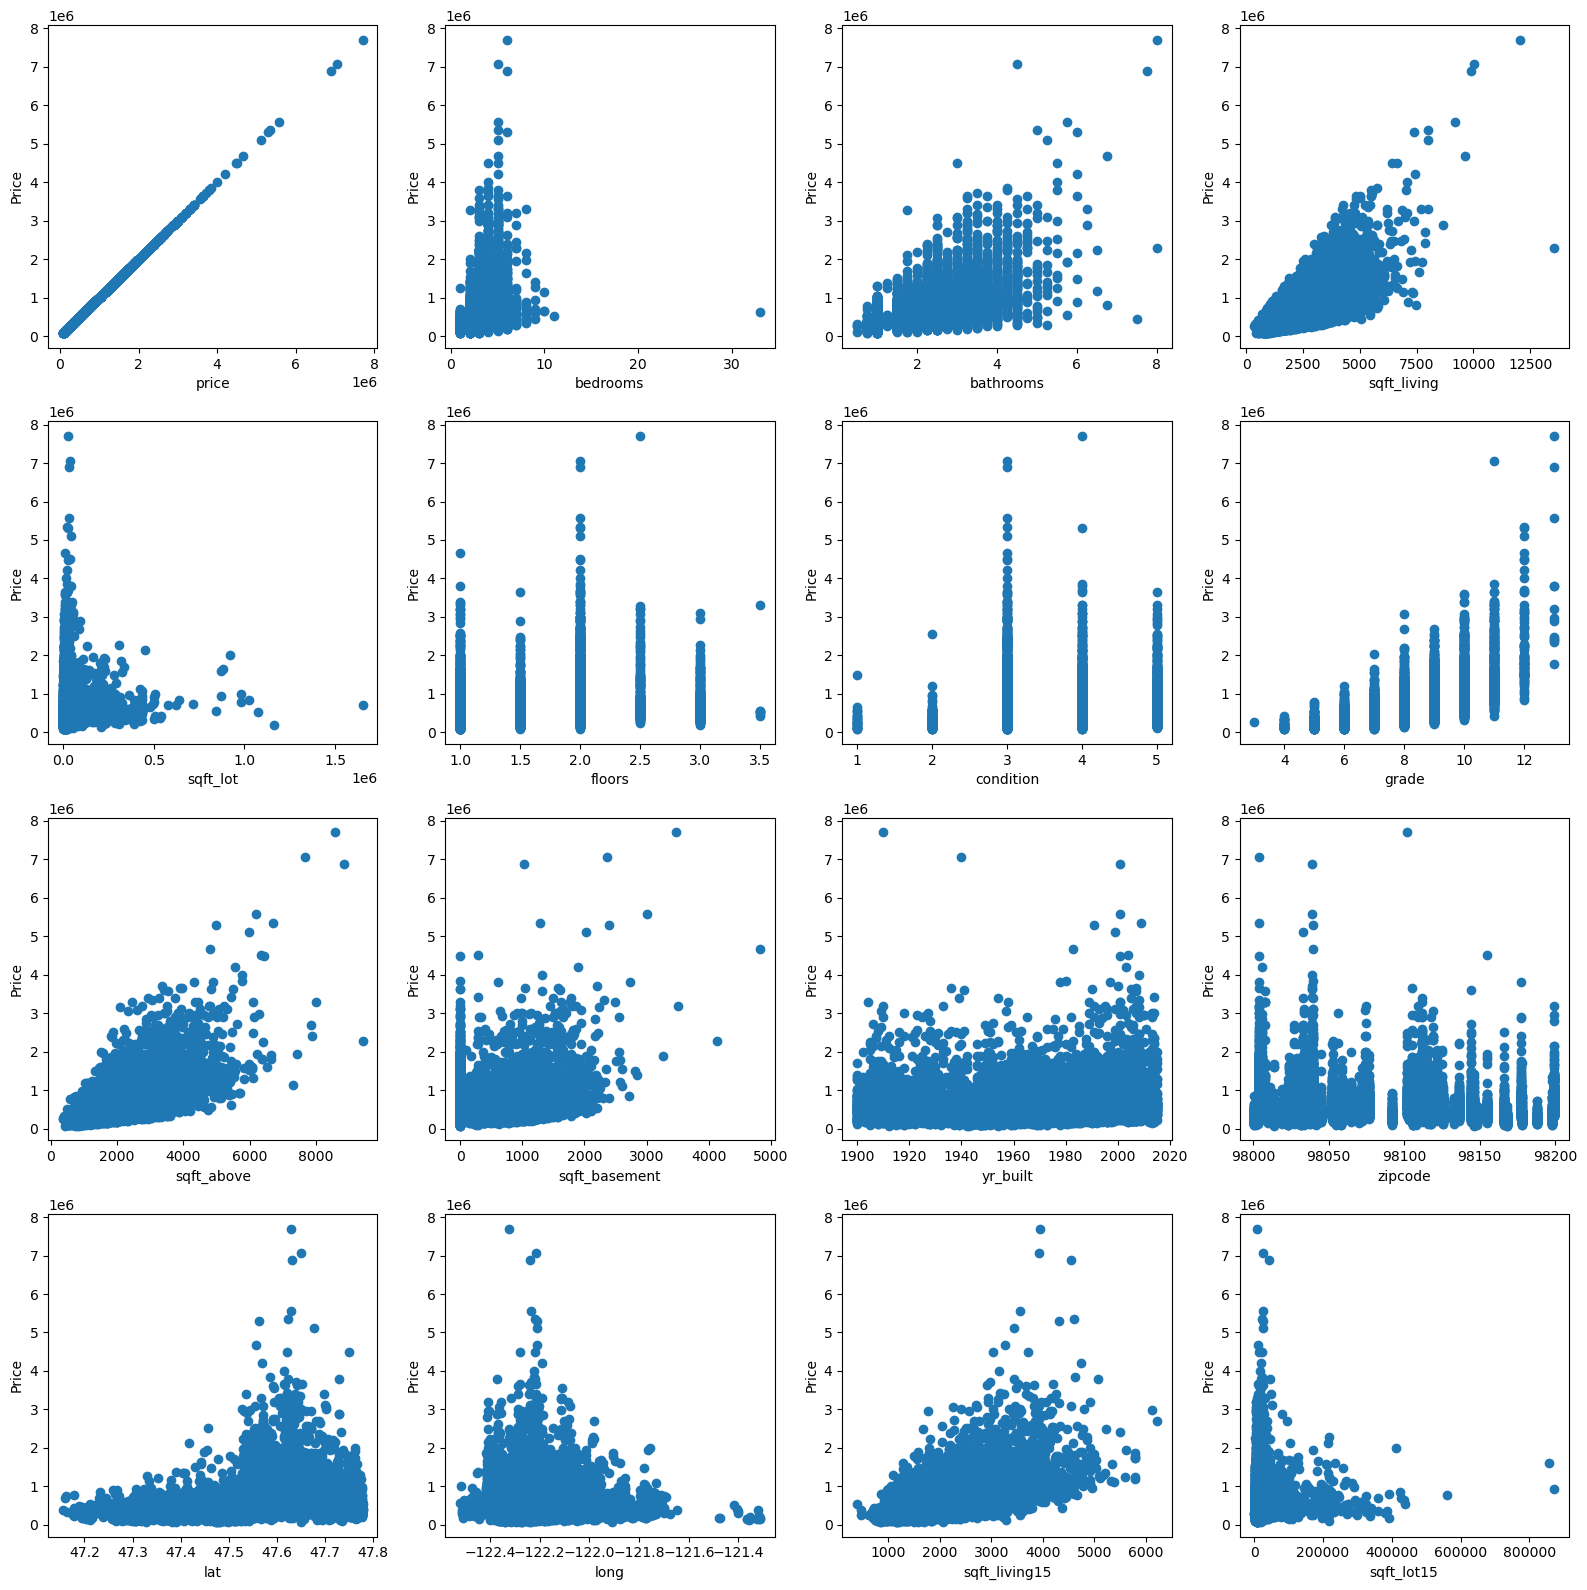

In [18]:
# Assuming you have a DataFrame named 'df' containing the data

num_cols = len(df.columns)
num_rows = (num_cols - 1) // 4 + 1

fig, axs = plt.subplots(num_rows, 4, figsize=(16, 4 * num_rows))
axs = axs.flatten()

# Iterate over the columns of the DataFrame and create scatter plots
columns = df.columns
for i, col in enumerate(columns):
    axs[i].scatter(df[col], df['price'])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price')

# Remove any unused subplots
for j in range(num_cols, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

# Obesrvation 
Based on the scatter plot analysis, we can observe a positive relationship between the variables 'sqft_above', 'sqft_living', and 'sqft_living15' with the target variable 'price'. As the values of these variables increase, there is a tendency for the corresponding price to also increase. This positive correlation is evident from the upward trend observed in the scatter plot.

Furthermore, the scatter plot reveals that certain latitude values within the range of 47.5 to 47.7 and longitude values between -122.4 and -122.0 exhibit higher prices. These specific geographic locations demonstrate a cluster of data points with elevated price levels.

However, it is important to consider that while the scatter plot provides insights into the relationships between these variables and the target variable, additional analysis and model refinement, such as data transformation and feature engineering, may be necessary to improve the model's performance and capture more complex patterns in the data. 

# Baseline Model

In [19]:

independent_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat',
                    'long', 'sqft_living15', 'sqft_lot15', 'condition']

dependent_var = 'price'

# Prepare the data for modeling
X = sm.add_constant(df[independent_vars])
y = df[dependent_var]

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Make predictions
y_pred = results.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     2782.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:47:43   Log-Likelihood:            -2.9332e+05
No. Observations:               21420   AIC:                         5.867e+05
Df Residuals:                   21404   BIC:                         5.868e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.523e+06   3.11e+06     -1.133

### Observation 
- The model has an R-squared value of 0.661, indicating that approximately 66.1% of the variation in house prices can be explained by the included variables.
- The mean squared error (MSE) is 45,887,693,244.32, and the root mean squared error (RMSE) is 214,214.13, representing the prediction accuracy of the model. (MSE AND RMSE are very high which needs to be reduced)
- The model diagnostics suggest deviations from normality in the residuals, and caution is advised regarding potential multicollinearity issues indicated by a high condition number.

Overall, the model shows moderate explanatory power with significant predictors, but further analysis is needed to address potential issues and evaluate overall model performance.

In [20]:
# Defining the hist_box() function
def hist_box(data,col):
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12,6))
  # Adding a graph in each part
  sns.boxplot(data[col], ax=ax_box, showmeans=True, orient='h')
  sns.distplot(data[col], ax=ax_hist)
  plt.show()

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


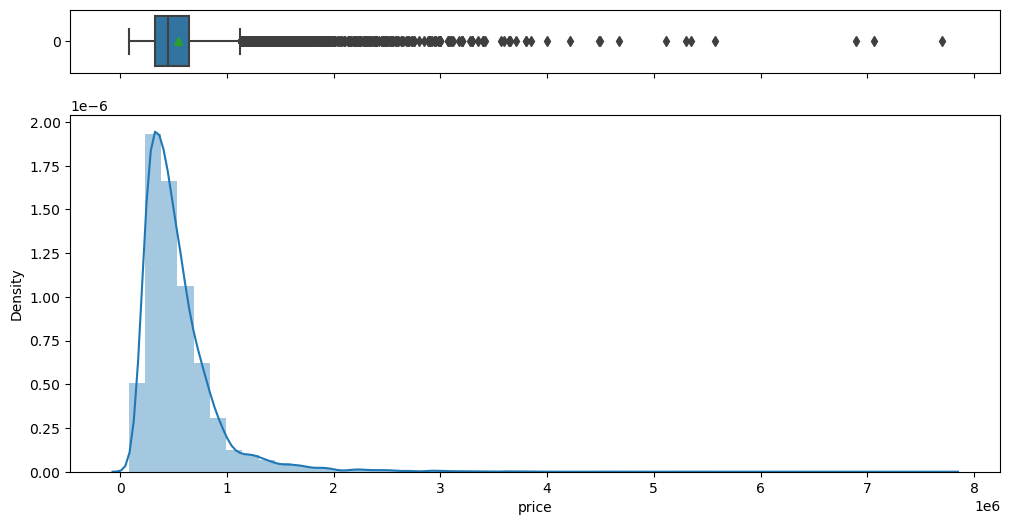

In [21]:
hist_box(df, 'price')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


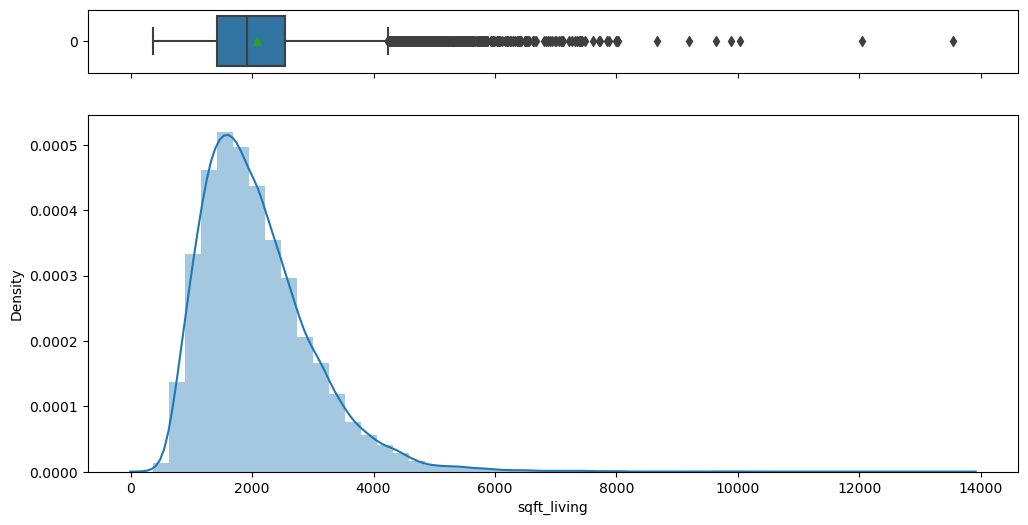

In [22]:
hist_box(df, 'sqft_living')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


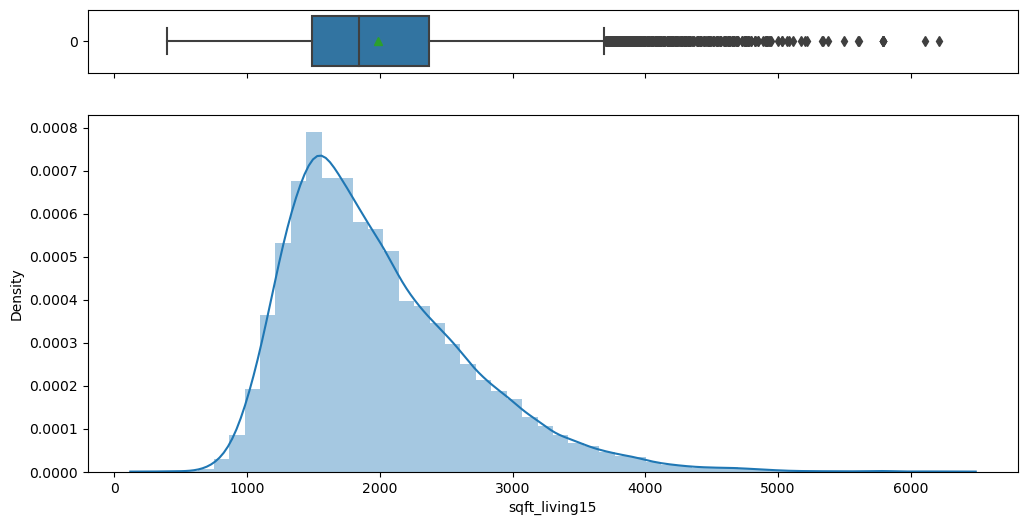

In [23]:
hist_box(df, 'sqft_living15')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


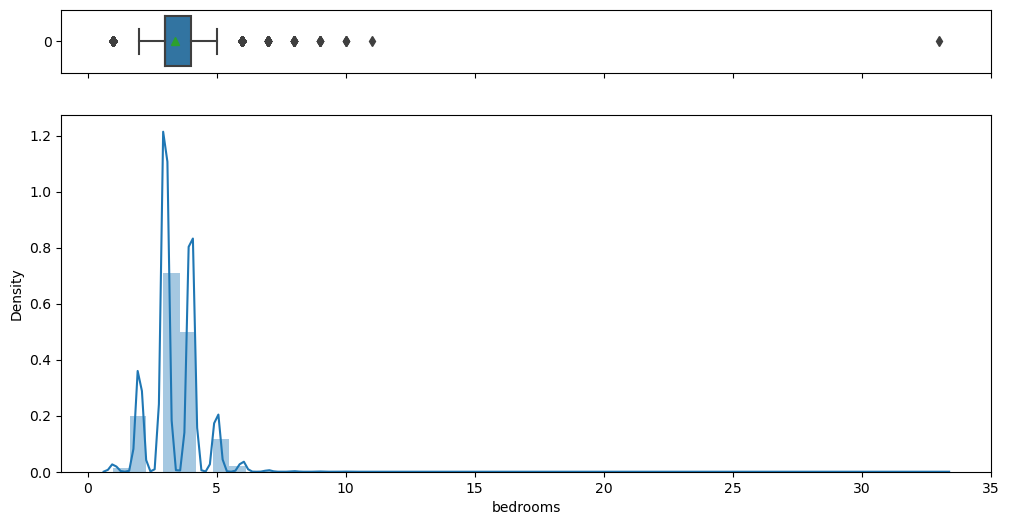

In [24]:
hist_box(df, 'bedrooms')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


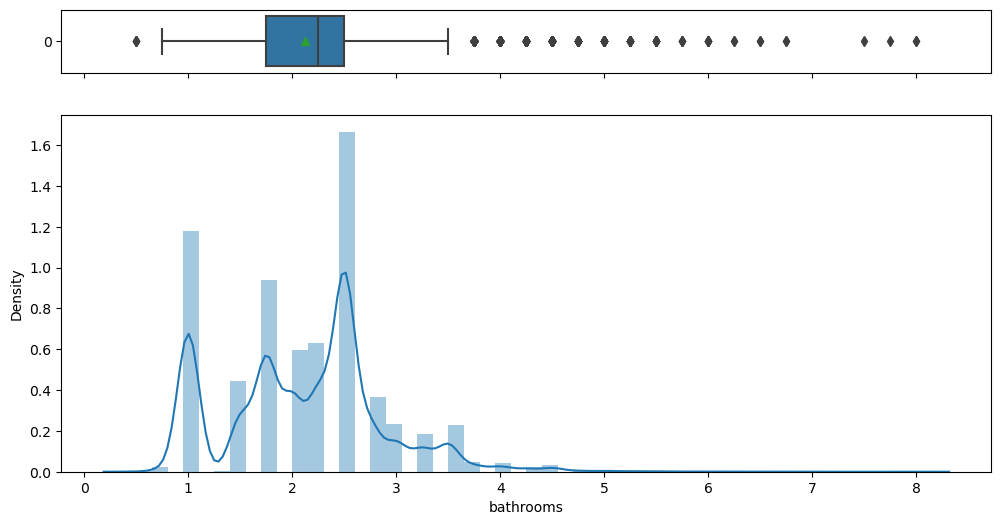

In [25]:
hist_box(df, 'bathrooms')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


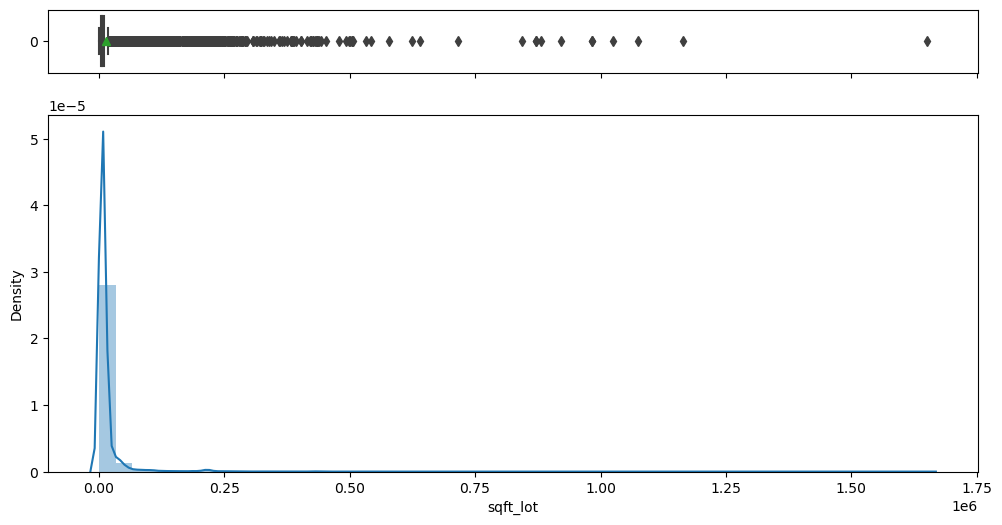

In [26]:
hist_box(df, 'sqft_lot')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


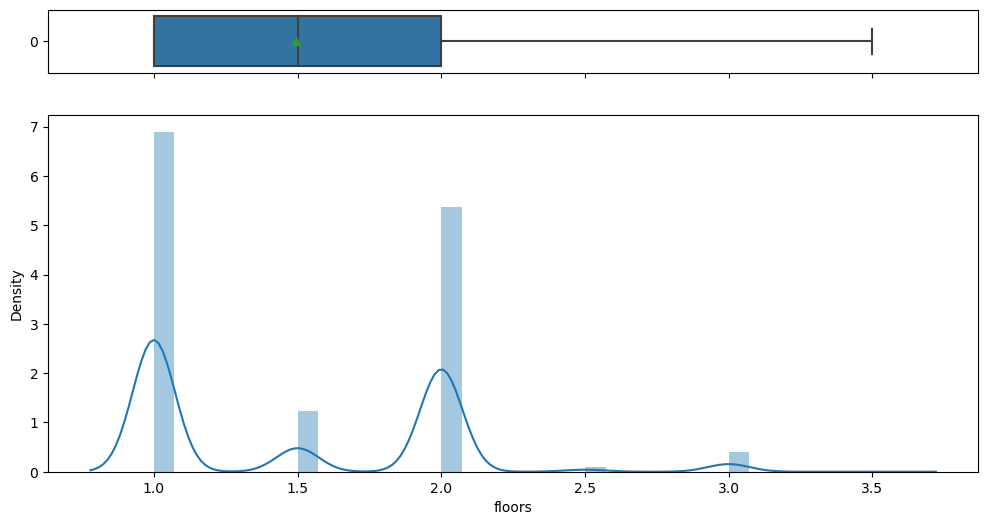

In [27]:
hist_box(df, 'floors')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


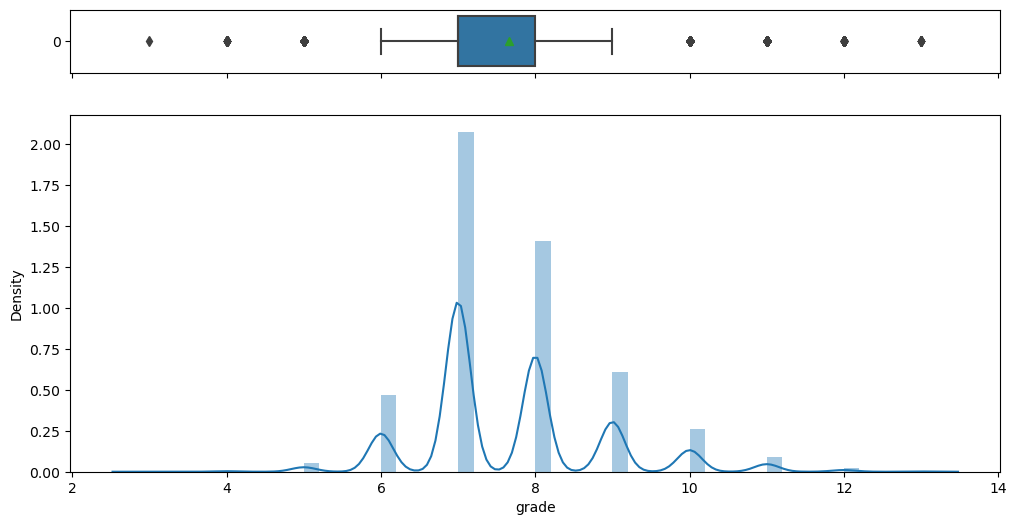

In [28]:
hist_box(df, 'grade')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


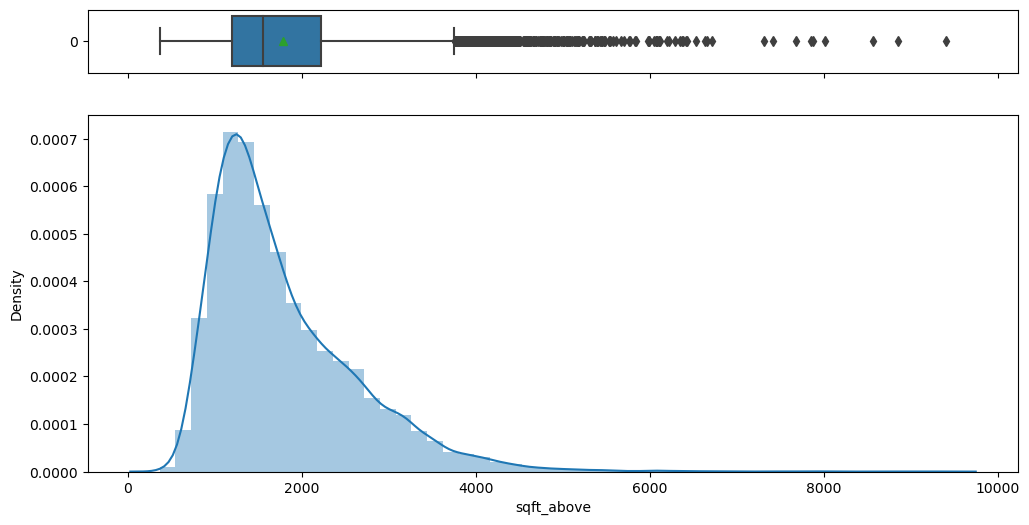

In [29]:
hist_box(df, 'sqft_above')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


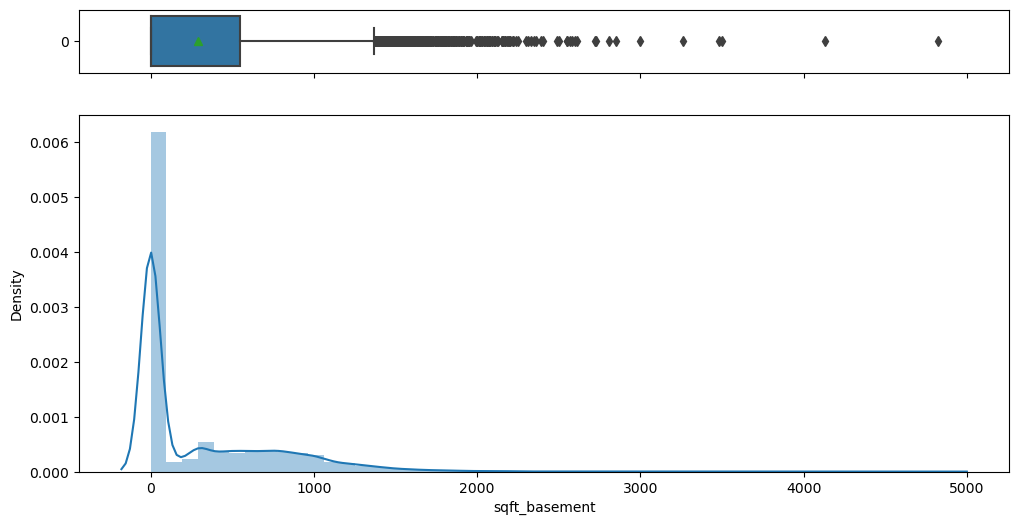

In [30]:
hist_box(df, 'sqft_basement')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


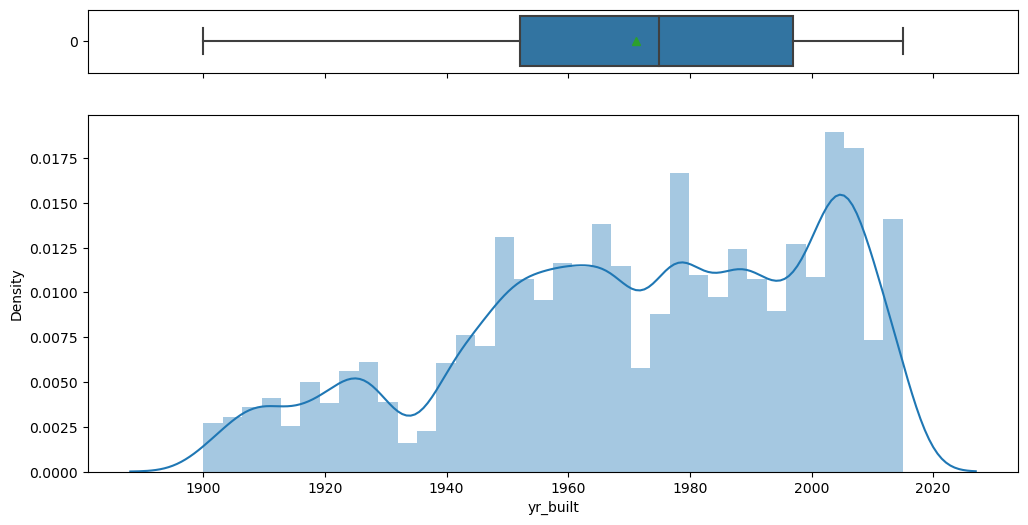

In [31]:
hist_box(df, 'yr_built')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


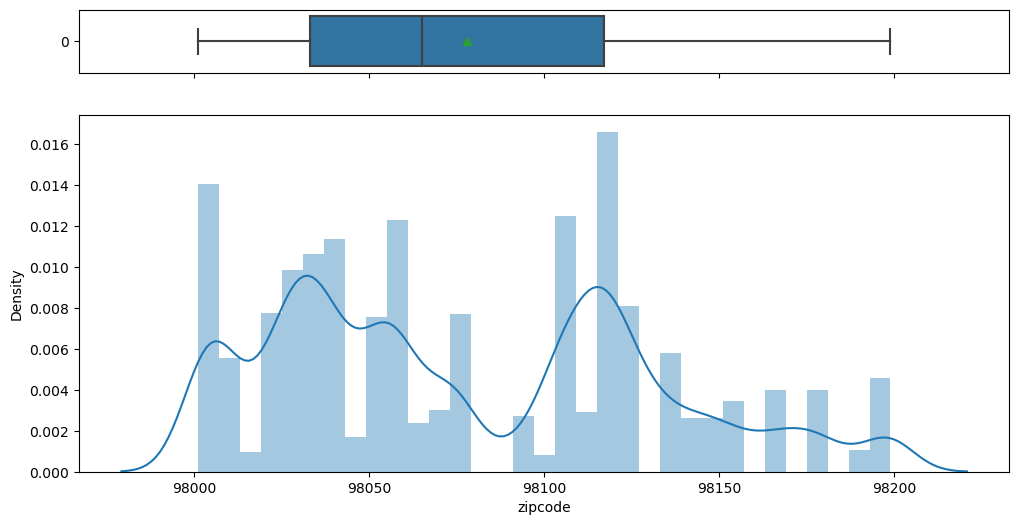

In [32]:
hist_box(df, 'zipcode')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


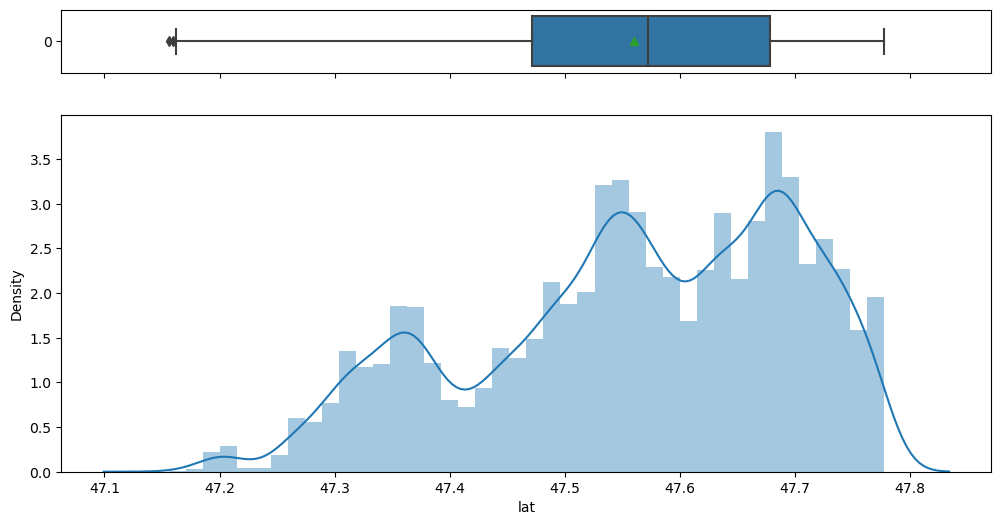

In [33]:
hist_box(df, 'lat')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


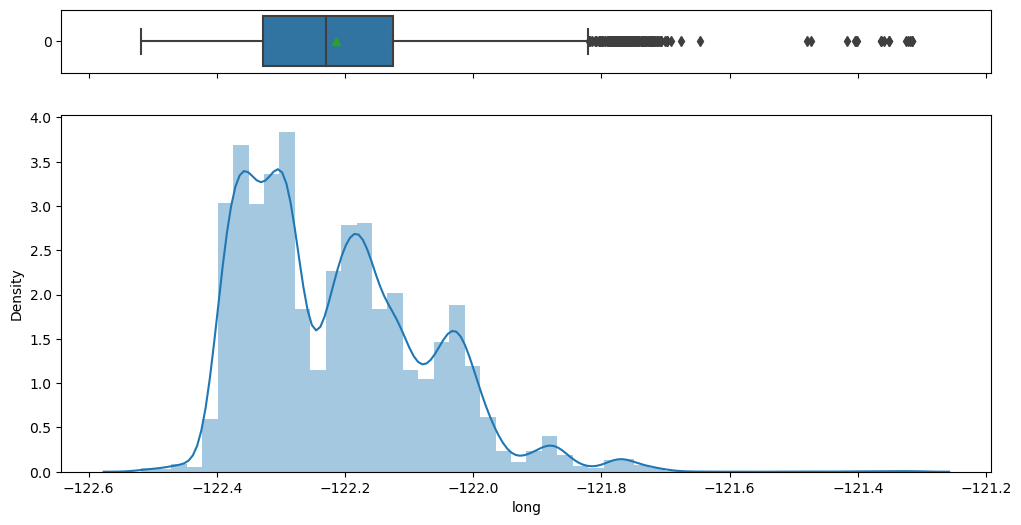

In [34]:
hist_box(df, 'long')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


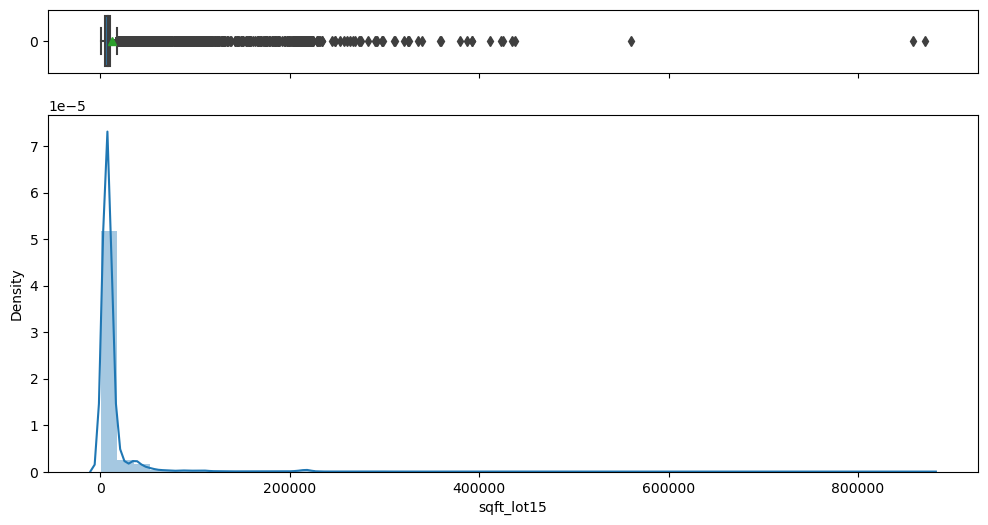

In [35]:
hist_box(df, 'sqft_lot15')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


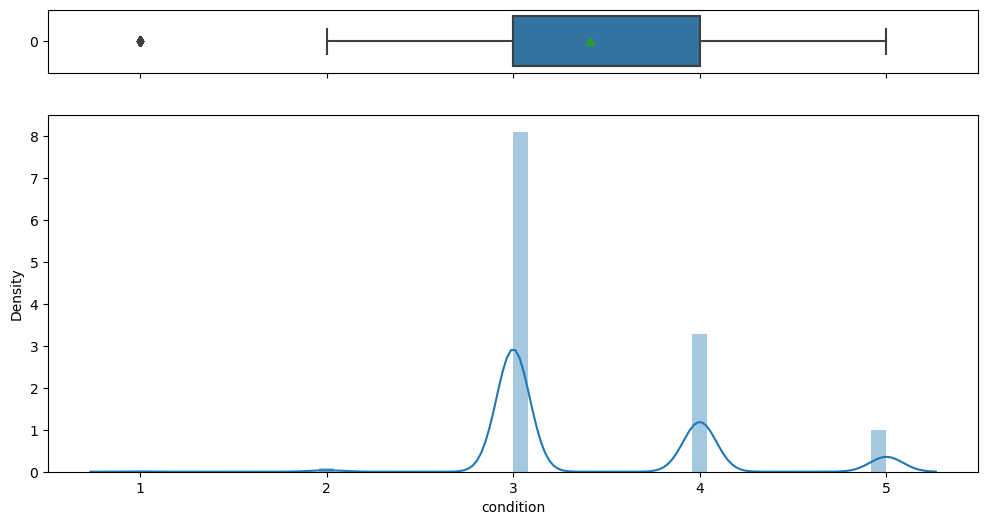

In [36]:
hist_box(df, 'condition')

# Observation

Upon examination, it is observed that the variables bedroom, bathroom, sqft_lot, sqft_lot15, floors, grade, condition, and sqft_basement do not exhibit a normal distribution. This indicates the need for additional data transformation and feature engineering techniques to address this issue. Applying appropriate transformations such as log transformations, scaling, or other techniques can help normalize the distributions and improve the model's performance.

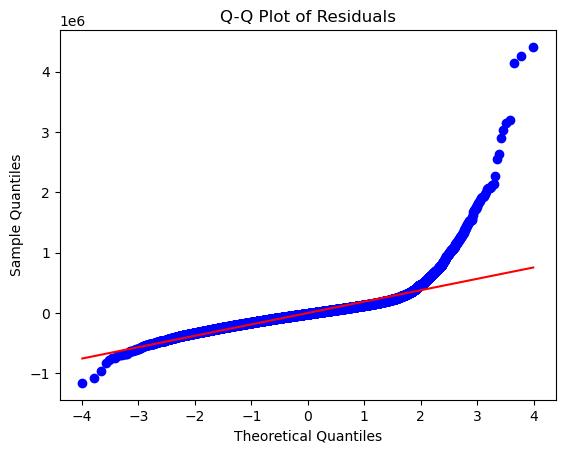

In [37]:
# Select relevant columns
independent_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','grade', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat',
                    'long', 'sqft_living15', 'sqft_lot15', 'condition']
dependent_var = 'price'

# Prepare the data
X = df[independent_vars]
y = df[dependent_var]

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Calculate residuals
predicted_values = model.predict(X)
residuals = y - predicted_values

# Create Q-Q plot of residuals
fig, ax = plt.subplots()
stats.probplot(residuals, plot=ax)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Observation 
The Q-Q plot of the residuals indicates non-normality, suggesting that further investigation and actions are needed. Addressing this issue is crucial as it can affect the model's validity and prediction accuracy. Consider exploring data transformations and conducting additional diagnostics to better understand the non-normality and improve the model's performance.

# Iteration 2

In [39]:
df2=df.copy() # a copy

In [40]:
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


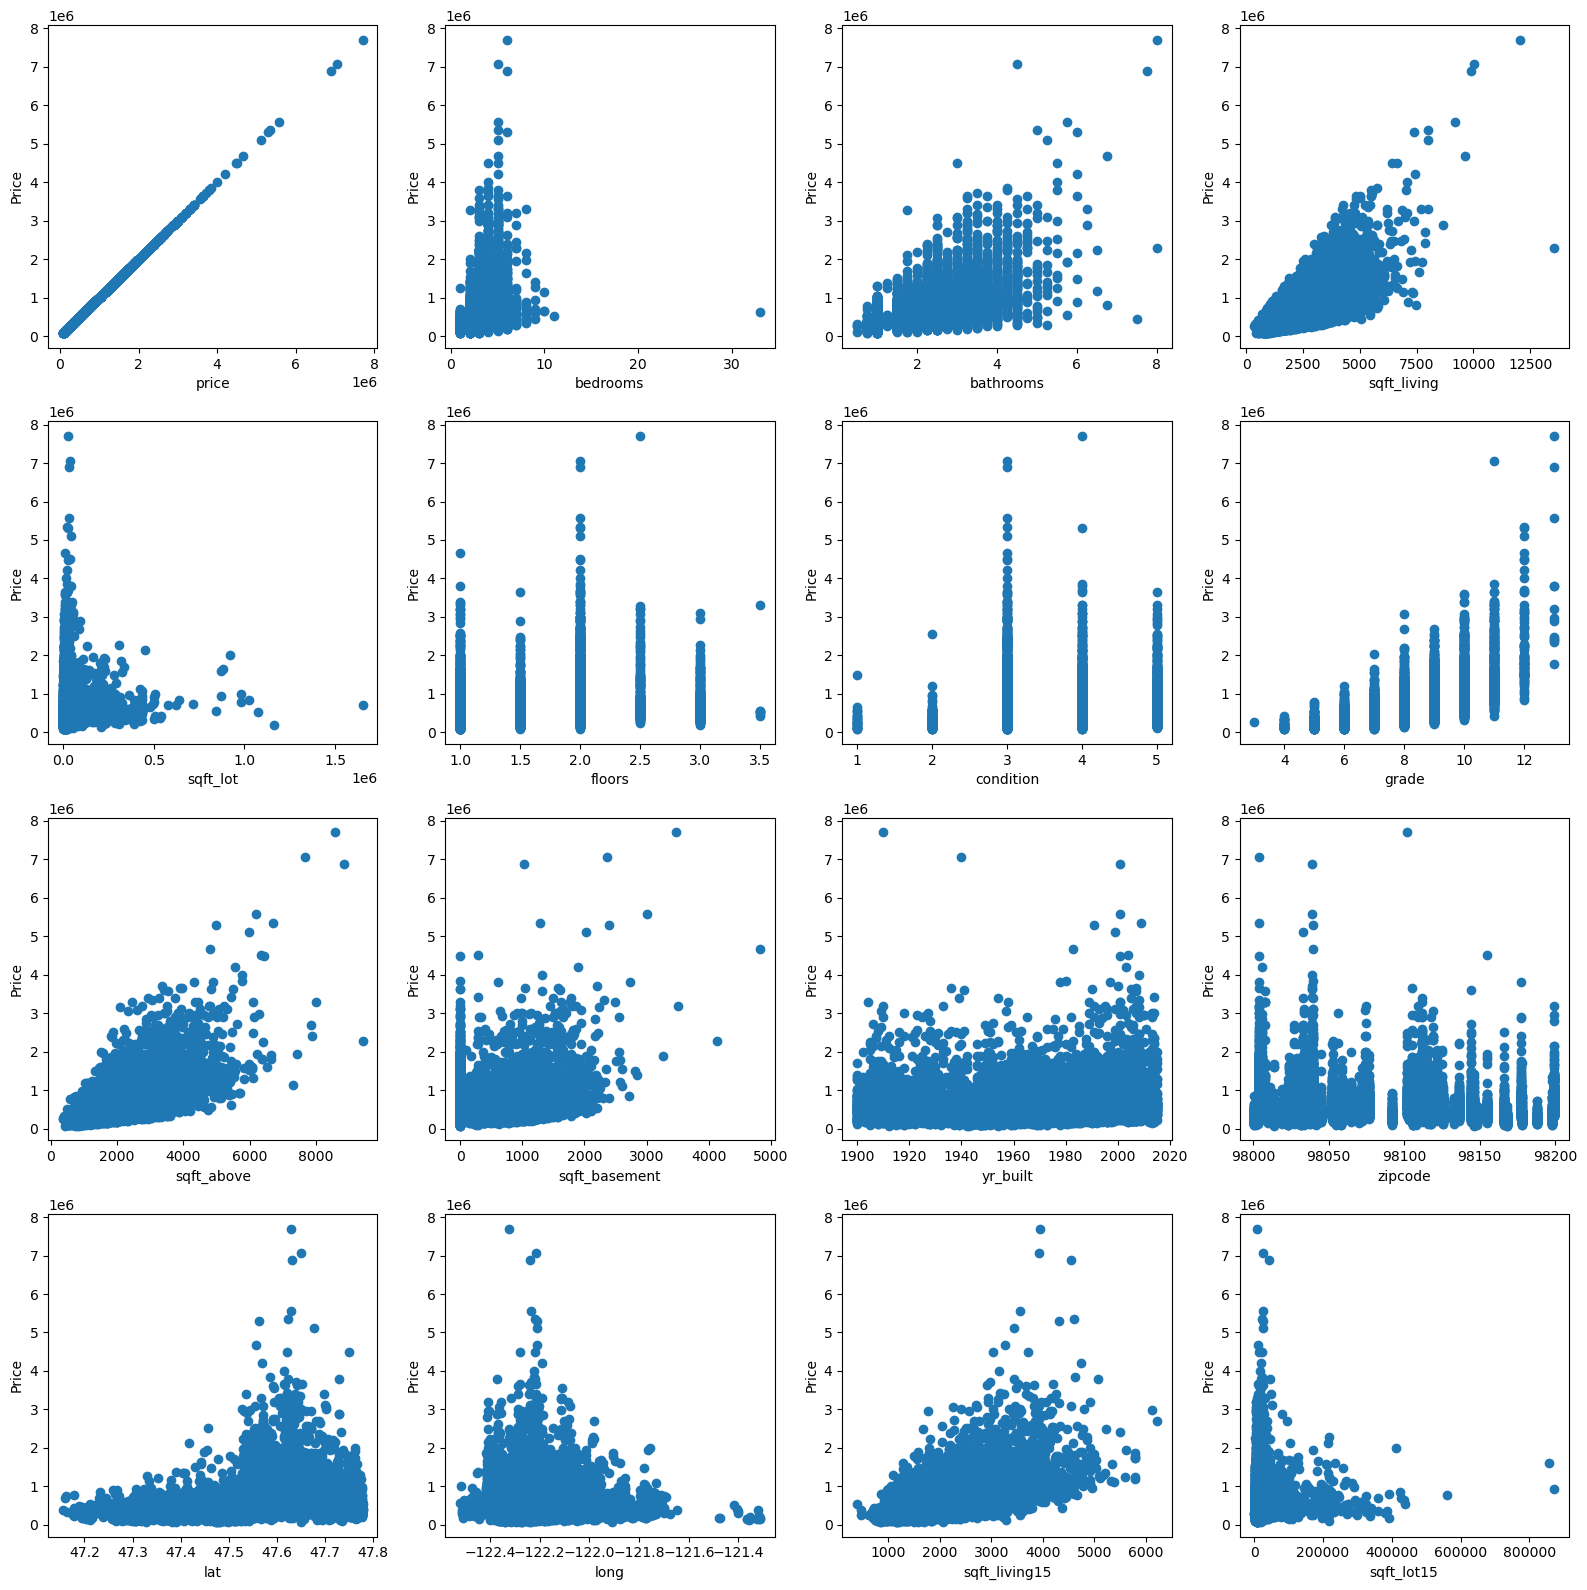

In [41]:
# Assuming you have a DataFrame named 'df' containing the data

num_cols2 = len(df2.columns)
num_rows2 = (num_cols2 - 1) // 4 + 1

fig, axs = plt.subplots(num_rows2, 4, figsize=(16, 4 * num_rows2))
axs = axs.flatten()

# Iterate over the columns of the DataFrame and create scatter plots
columns2 = df2.columns
for i, col in enumerate(columns2):
    axs[i].scatter(df2[col], df2['price'])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price')

# Remove any unused subplots
for j in range(num_cols2, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

### LOG TRANSFORATION


In [42]:
# Apply log transformation to 'price'
df2['price'] = np.log1p(df2['price'])

# Apply log transformation to 'sqft_living'
df2['sqft_living'] = np.log1p(df2['sqft_living'])

# Apply log transformation to 'sqft_living15'
df2['sqft_living15'] = np.log1p(df2['sqft_living15'])

# Apply log transformation to 'sqft_above'
df2['sqft_above'] = np.log1p(df2['sqft_above'])

### Removing outliers for sqft_lot, sqft_lot15, sqft_basement

In [43]:
# Calculate the IQR for 'sqft_lot'
Q1_sqft_lot = df2['sqft_lot'].quantile(0.25)
Q3_sqft_lot = df2['sqft_lot'].quantile(0.75)
IQR_sqft_lot = Q3_sqft_lot - Q1_sqft_lot

# Remove outliers based on the IQR for 'sqft_lot'
df2 = df2[(df2['sqft_lot'] >= Q1_sqft_lot - 1.5 * IQR_sqft_lot) & (df2['sqft_lot'] <= Q3_sqft_lot + 1.5 * IQR_sqft_lot)]

# Calculate the IQR for 'sqft_lot15'
Q1_sqft_lot15 = df2['sqft_lot15'].quantile(0.25)
Q3_sqft_lot15 = df2['sqft_lot15'].quantile(0.75)
IQR_sqft_lot15 = Q3_sqft_lot15 - Q1_sqft_lot15

# Remove outliers based on the IQR for 'sqft_lot15'
df2 = df2[(df2['sqft_lot15'] >= Q1_sqft_lot15 - 1.5 * IQR_sqft_lot15) & (df2['sqft_lot15'] <= Q3_sqft_lot15 + 1.5 * IQR_sqft_lot15)]

# Calculate the IQR for 'sqft_basement'
Q1_sqft_basement = df2['sqft_basement'].quantile(0.25)
Q3_sqft_basement = df2['sqft_basement'].quantile(0.75)
IQR_sqft_basement = Q3_sqft_basement - Q1_sqft_basement

# Remove outliers based on the IQR for 'sqft_basement'
df2 = df2[(df2['sqft_basement'] >= Q1_sqft_basement - 1.5 * IQR_sqft_basement) & (df2['sqft_basement'] <= Q3_sqft_basement + 1.5 * IQR_sqft_basement)]

### Draw scatter plot after outliers removed

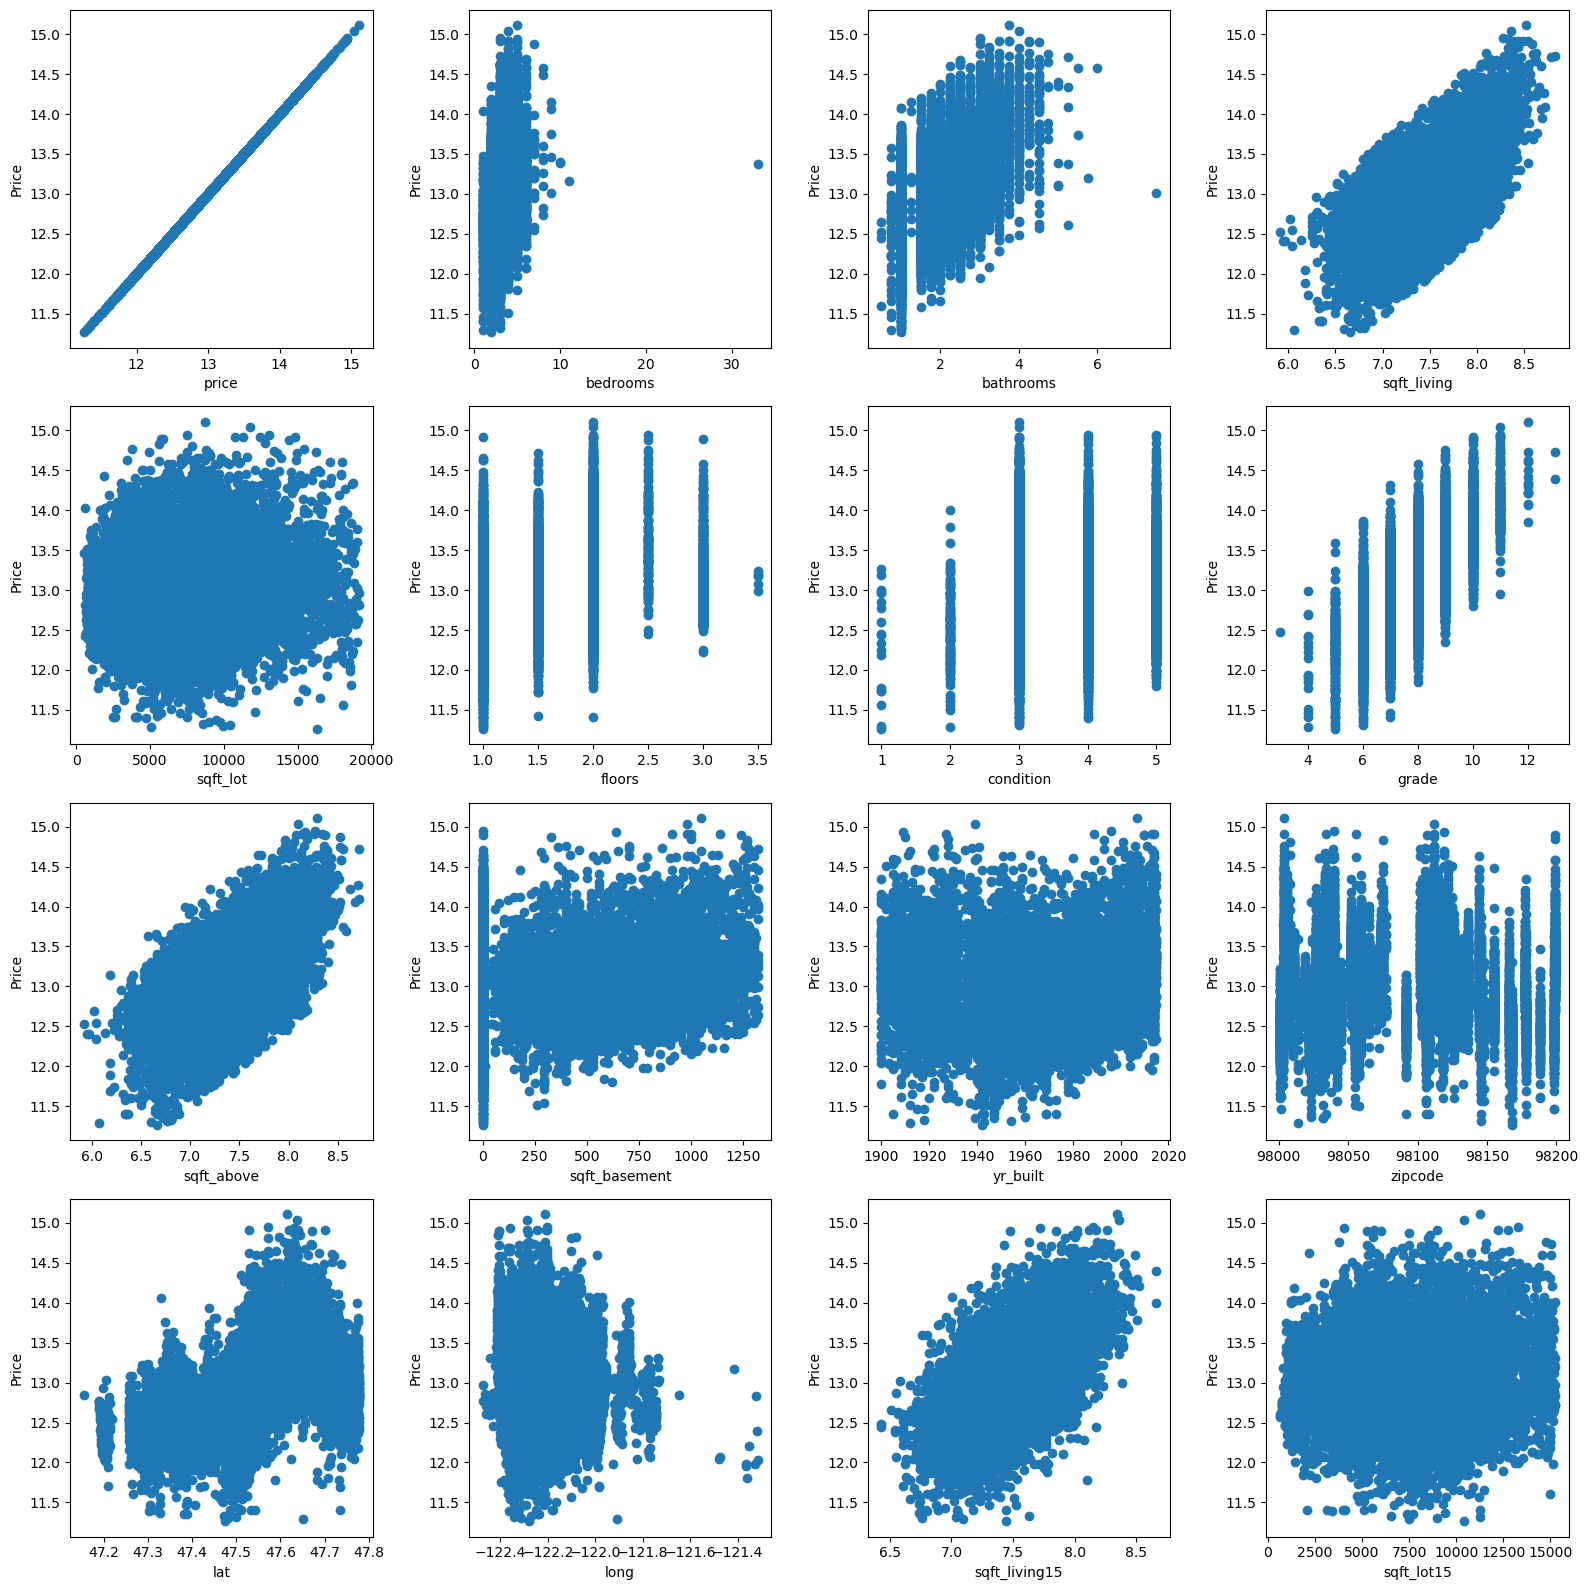

In [44]:
# Assuming you have a DataFrame named 'df' containing the data

num_cols2 = len(df2.columns)
num_rows2 = (num_cols2 - 1) // 4 + 1

fig, axs = plt.subplots(num_rows2, 4, figsize=(16, 4 * num_rows2))
axs = axs.flatten()

# Iterate over the columns of the DataFrame and create scatter plots
columns2 = df2.columns
for i, col in enumerate(columns2):
    axs[i].scatter(df2[col], df2['price'])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price')

# Remove any unused subplots
for j in range(num_cols2, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

### Draw line scatter plot

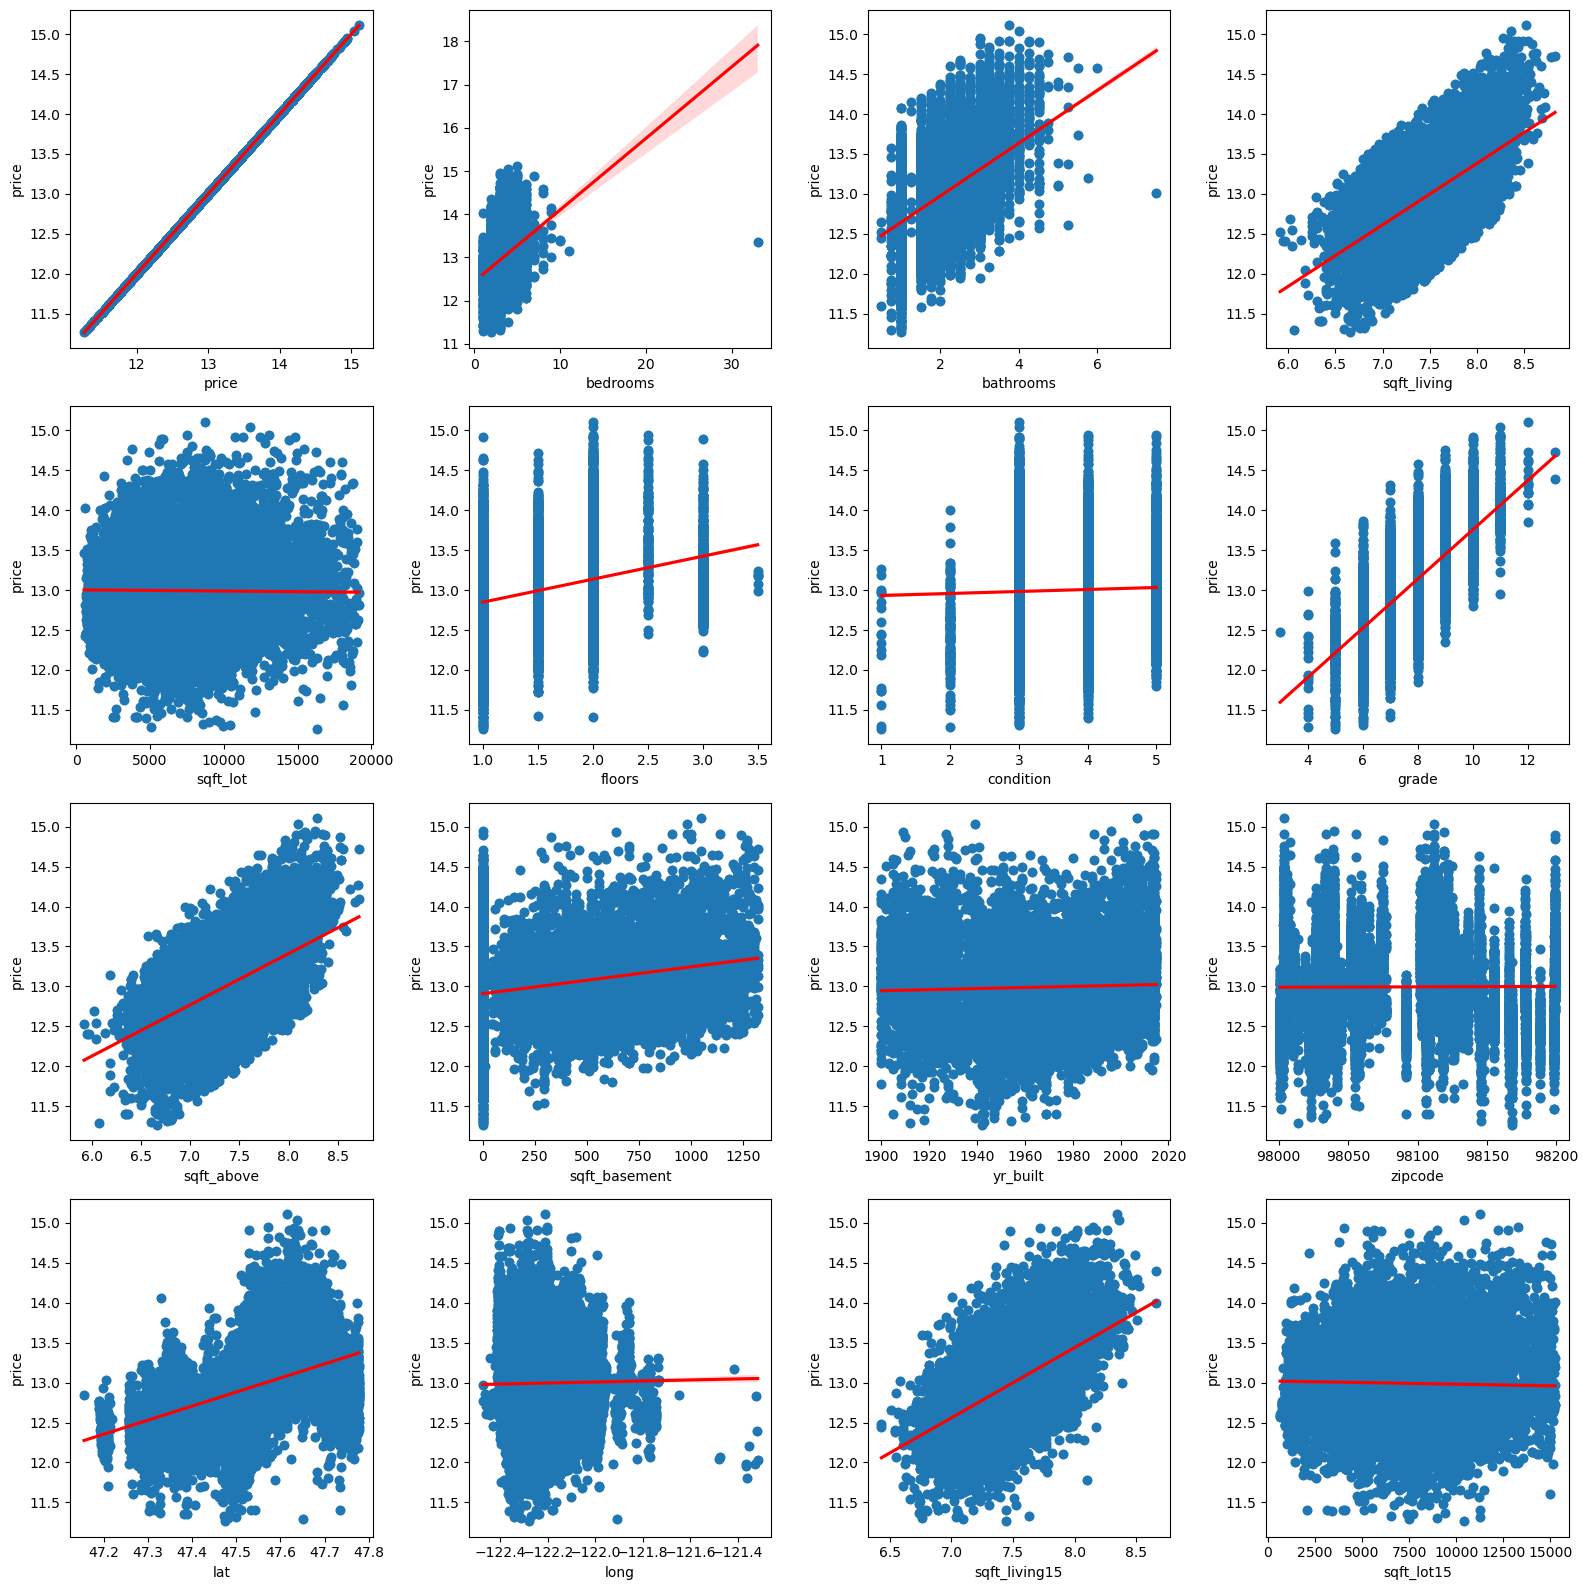

In [45]:
num_cols2 = len(df2.columns)
num_rows2 = (num_cols2 - 1) // 4 + 1

# Create subplots for scatter plots
fig, axs = plt.subplots(num_rows2, 4, figsize=(16, 4 * num_rows2))
axs = axs.flatten()

# Iterate over the columns of the DataFrame and create scatter plots with regression lines
columns2 = df2.columns
for i, col in enumerate(columns2):
    # Scatter plot
    axs[i].scatter(df2[col], df2['price'])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price')
    
    # Regression line
    sns.regplot(x=df2[col], y=df2['price'], ax=axs[i], line_kws={'color': 'red'})

# Remove any unused subplots
for j in range(num_cols2, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

### Identify multicollinearity by correlation matrix plot 

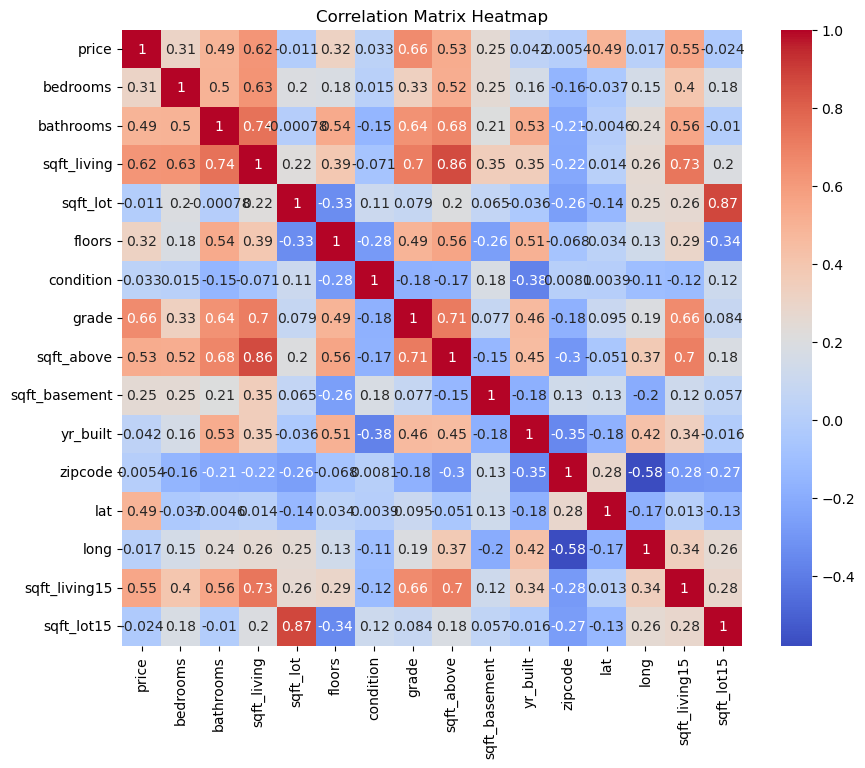

In [46]:
# Create a correlation matrix
corr_matrix = df2.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Observation 

Based on the correlation coefficients between the independent variables and the target variable 'price', here are some observations:

Strong Positive Correlations: Variables such as 'sqft_living' (0.62), 'grade' (0.66), and 'sqft_living15' (0.55) exhibit strong positive correlations with 'price'. This indicates that as these variables increase, the 'price' tends to increase as well.

Moderate Positive Correlations: Variables such as 'bathrooms' (0.49), 'sqft_above' (0.53), 'lat' (0.49), and 'floors' (0.32) show moderate positive correlations with 'price'. An increase in these variables generally corresponds to an increase in 'price', although the relationship may not be as strong as the variables mentioned above.

Weak Correlations: Some variables like 'bedrooms' (0.31), 'sqft_basement' (0.25), 'long' (0.017), 'condition' (0.033), 'yr_built' (0.042), 'sqft_lot15' (0.024), 'sqft_lot' (0.011), and 'zipcode' (0.0054) have weak correlations with 'price'. These variables may have less influence on the 'price' compared to other variables in the model.

Overall, the observed correlations suggest that variables such as 'sqft_living', 'grade', and 'sqft_living15' have the strongest positive relationship with 'price', while variables like 'bedrooms', 'sqft_basement', 'long', 'condition', 'yr_built', 'sqft_lot15', 'sqft_lot', and 'zipcode' have weaker correlations. 

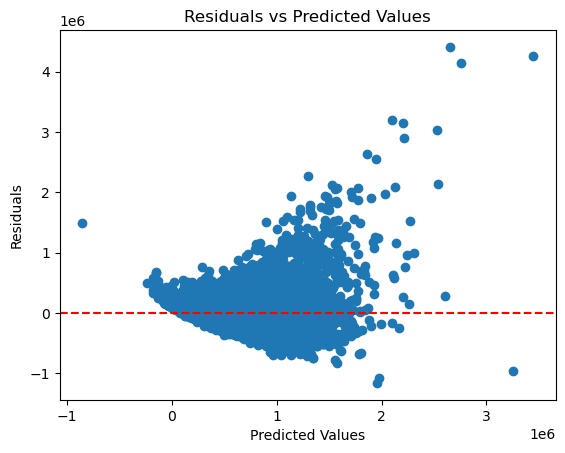

In [47]:
residuals = results.resid

# Plot the residuals against the predicted values
plt.scatter(results.fittedvalues, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')

# Add a horizontal line at y = 0 for reference
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


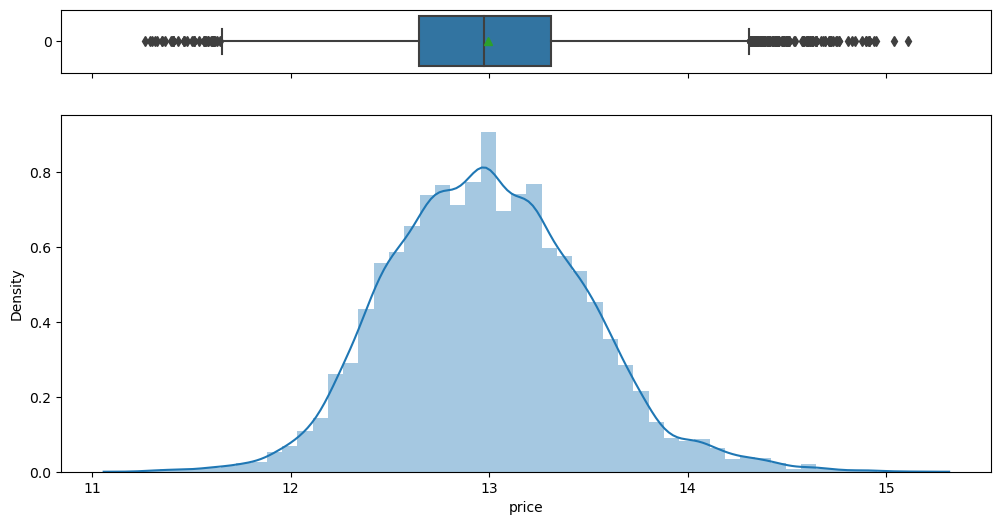

In [48]:
hist_box(df2, 'price')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


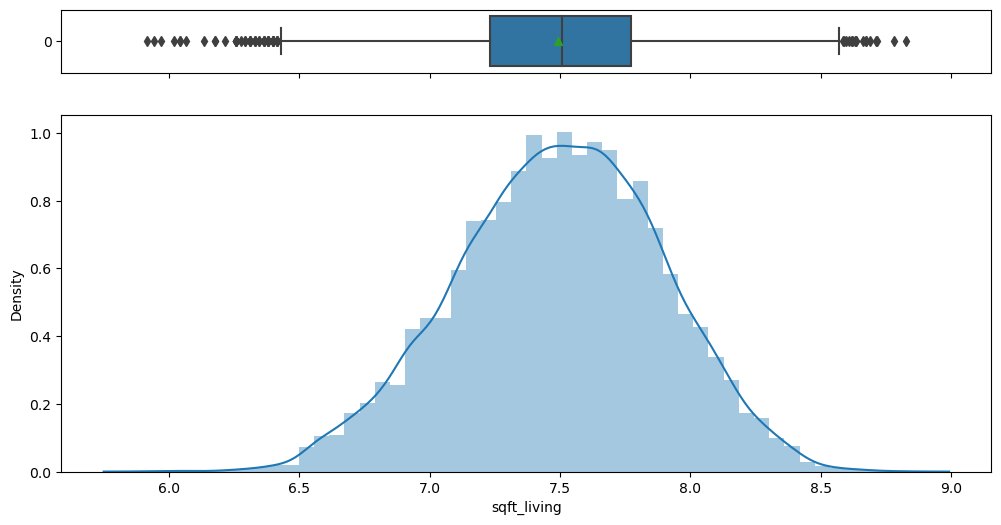

In [49]:
hist_box(df2, 'sqft_living')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


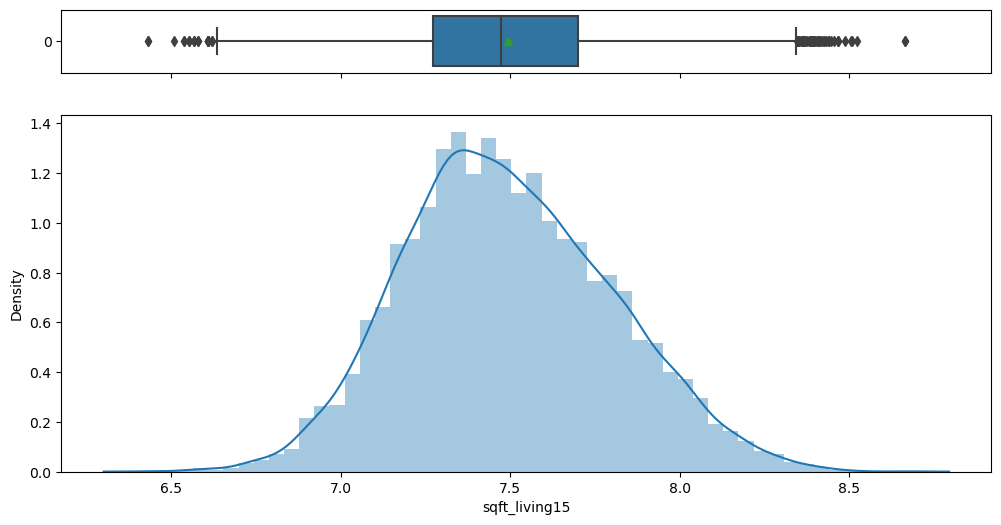

In [50]:
hist_box(df2, 'sqft_living15')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


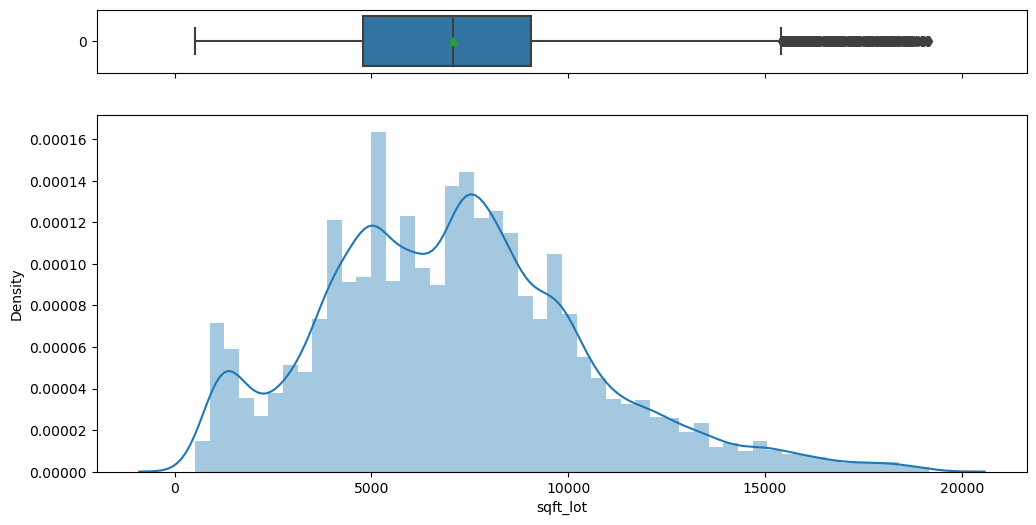

In [51]:
hist_box(df2, 'sqft_lot')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


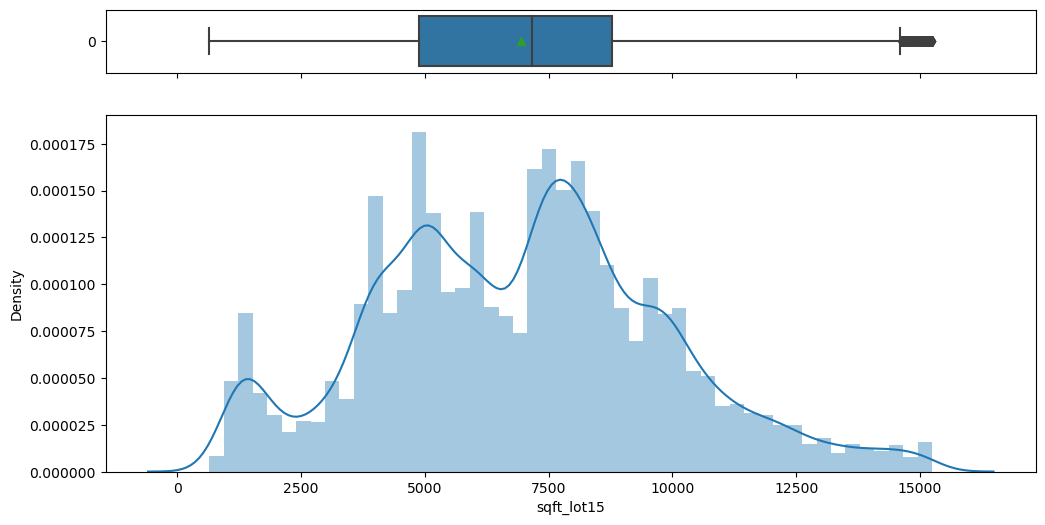

In [52]:
hist_box(df2, 'sqft_lot15')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


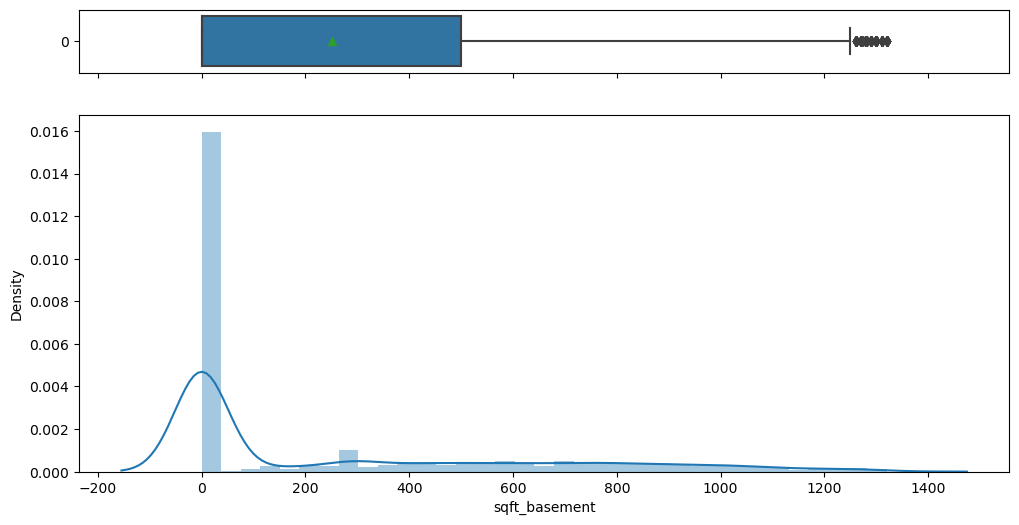

In [53]:
hist_box(df2, 'sqft_basement')

C:\Users\zumrae01\AppData\Local\Temp\ipykernel_6900\3252243263.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=ax_hist)


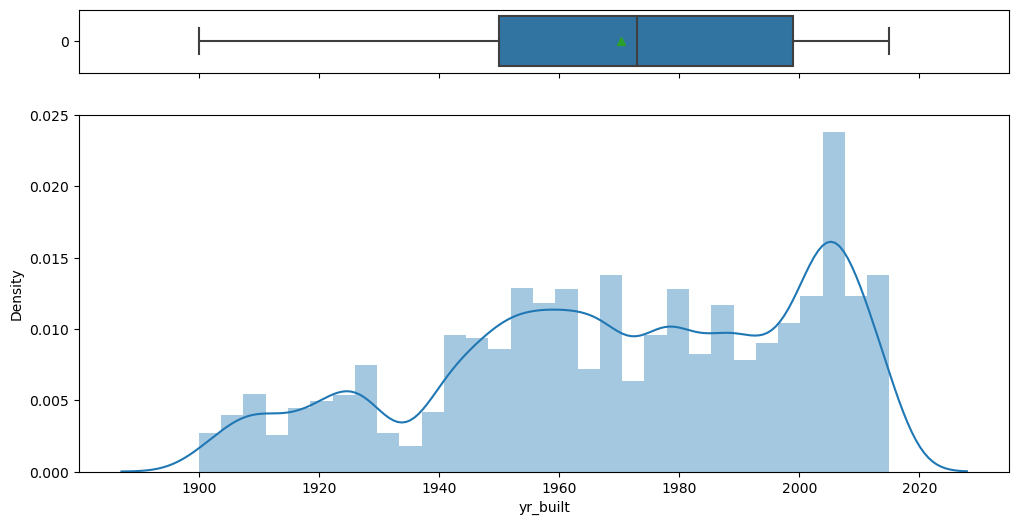

In [54]:
hist_box(df2, 'yr_built')

In [55]:
independent_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'condition', 'zipcode', 'lat','long']

dependent_var = 'price'

# Prepare the data for modeling
X = sm.add_constant(df2[independent_vars])
y = df2[dependent_var]

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Make predictions
y_pred = results.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     3624.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:48:15   Log-Likelihood:                -205.41
No. Observations:               18049   AIC:                             442.8
Df Residuals:                   18033   BIC:                             567.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -15.4859      3.963     -3.908

# Observation
The OLS regression model shows a high R-squared value of 0.751, indicating that approximately 75.1% of the variance in the dependent variable (price) can be explained by the independent variables. The coefficients for the predictor variables suggest that bedrooms, bathrooms, sqft_living, floors, grade, sqft_above, sqft_basement, yr_built, sqft_living15, sqft_lot15, condition, zipcode, lat, and long have a significant impact on the price. The model's performance is further supported by the low mean squared error (MSE) of 0.0599 and the root mean squared error (RMSE) of 0.2447. However, it's worth noting that the condition number is large, indicating potential multicollinearity or other numerical issues that require further investigation.

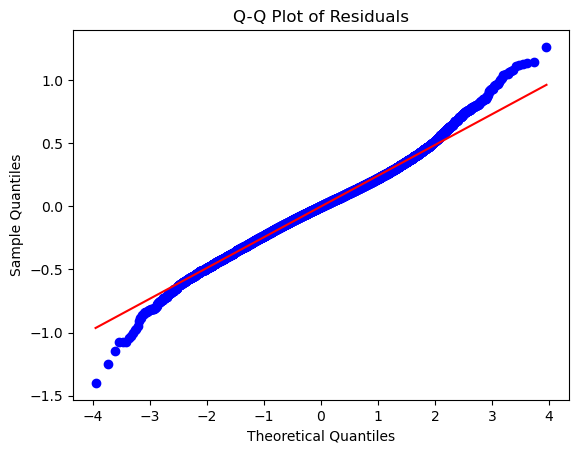

In [56]:
# Select relevant columns
independent_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15', 'condition', 'zipcode', 'lat','long']
dependent_var = 'price'

# Prepare the data
X = df2[independent_vars]
y = df2[dependent_var]

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Calculate residuals
predicted_values = model.predict(X)
residuals = y - predicted_values

# Create Q-Q plot of residuals
fig, ax = plt.subplots()
stats.probplot(residuals, plot=ax)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Observation 
The Q-Q plot of the residuals has improved, indicating progress in addressing the issue of non-normality. This is an important development as it enhances the model's validity and prediction accuracy. However, it is still advisable to continue investigating and taking appropriate actions to further enhance the model's performance. Additional data transformations and diagnostics can be explored to gain a better understanding of the residual distribution and ensure that the model meets the necessary assumptions.

# Iteration 3

## Feature Engineering 

In [57]:
df3=df2.copy()

In [58]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,12.309987,3,1.00,7.074117,5650,1.0,3,7,7.074117,0.0,1955,98178,47.5112,-122.257,7.201171,5650
1,13.195616,3,2.25,7.852050,7242,2.0,3,7,7.682943,400.0,1951,98125,47.7210,-122.319,7.433075,7639
2,12.100718,2,1.00,6.647688,10000,1.0,3,6,6.647688,0.0,1933,98028,47.7379,-122.233,7.908755,8062
3,13.311331,4,3.00,7.581210,5000,1.0,5,7,6.957497,910.0,1965,98136,47.5208,-122.393,7.215975,5000
4,13.142168,3,2.00,7.427144,8080,1.0,3,8,7.427144,0.0,1987,98074,47.6168,-122.045,7.496097,7503


In [59]:
#Adding has_basement parameter - 1 where basement area > 0 
df3['has_basement'] = (df3['sqft_basement'] > 0).astype(int)

In [60]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,12.309987,3,1.00,7.074117,5650,1.0,3,7,7.074117,0.0,1955,98178,47.5112,-122.257,7.201171,5650,0
1,13.195616,3,2.25,7.852050,7242,2.0,3,7,7.682943,400.0,1951,98125,47.7210,-122.319,7.433075,7639,1
2,12.100718,2,1.00,6.647688,10000,1.0,3,6,6.647688,0.0,1933,98028,47.7379,-122.233,7.908755,8062,0
3,13.311331,4,3.00,7.581210,5000,1.0,5,7,6.957497,910.0,1965,98136,47.5208,-122.393,7.215975,5000,1
4,13.142168,3,2.00,7.427144,8080,1.0,3,8,7.427144,0.0,1987,98074,47.6168,-122.045,7.496097,7503,0


then we drop sqft_basement column 

In [61]:
#Dropping sqft_basement column
df3.drop(columns='sqft_basement', inplace=True)


In [62]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,12.309987,3,1.00,7.074117,5650,1.0,3,7,7.074117,1955,98178,47.5112,-122.257,7.201171,5650,0
1,13.195616,3,2.25,7.852050,7242,2.0,3,7,7.682943,1951,98125,47.7210,-122.319,7.433075,7639,1
2,12.100718,2,1.00,6.647688,10000,1.0,3,6,6.647688,1933,98028,47.7379,-122.233,7.908755,8062,0
3,13.311331,4,3.00,7.581210,5000,1.0,5,7,6.957497,1965,98136,47.5208,-122.393,7.215975,5000,1
4,13.142168,3,2.00,7.427144,8080,1.0,3,8,7.427144,1987,98074,47.6168,-122.045,7.496097,7503,0


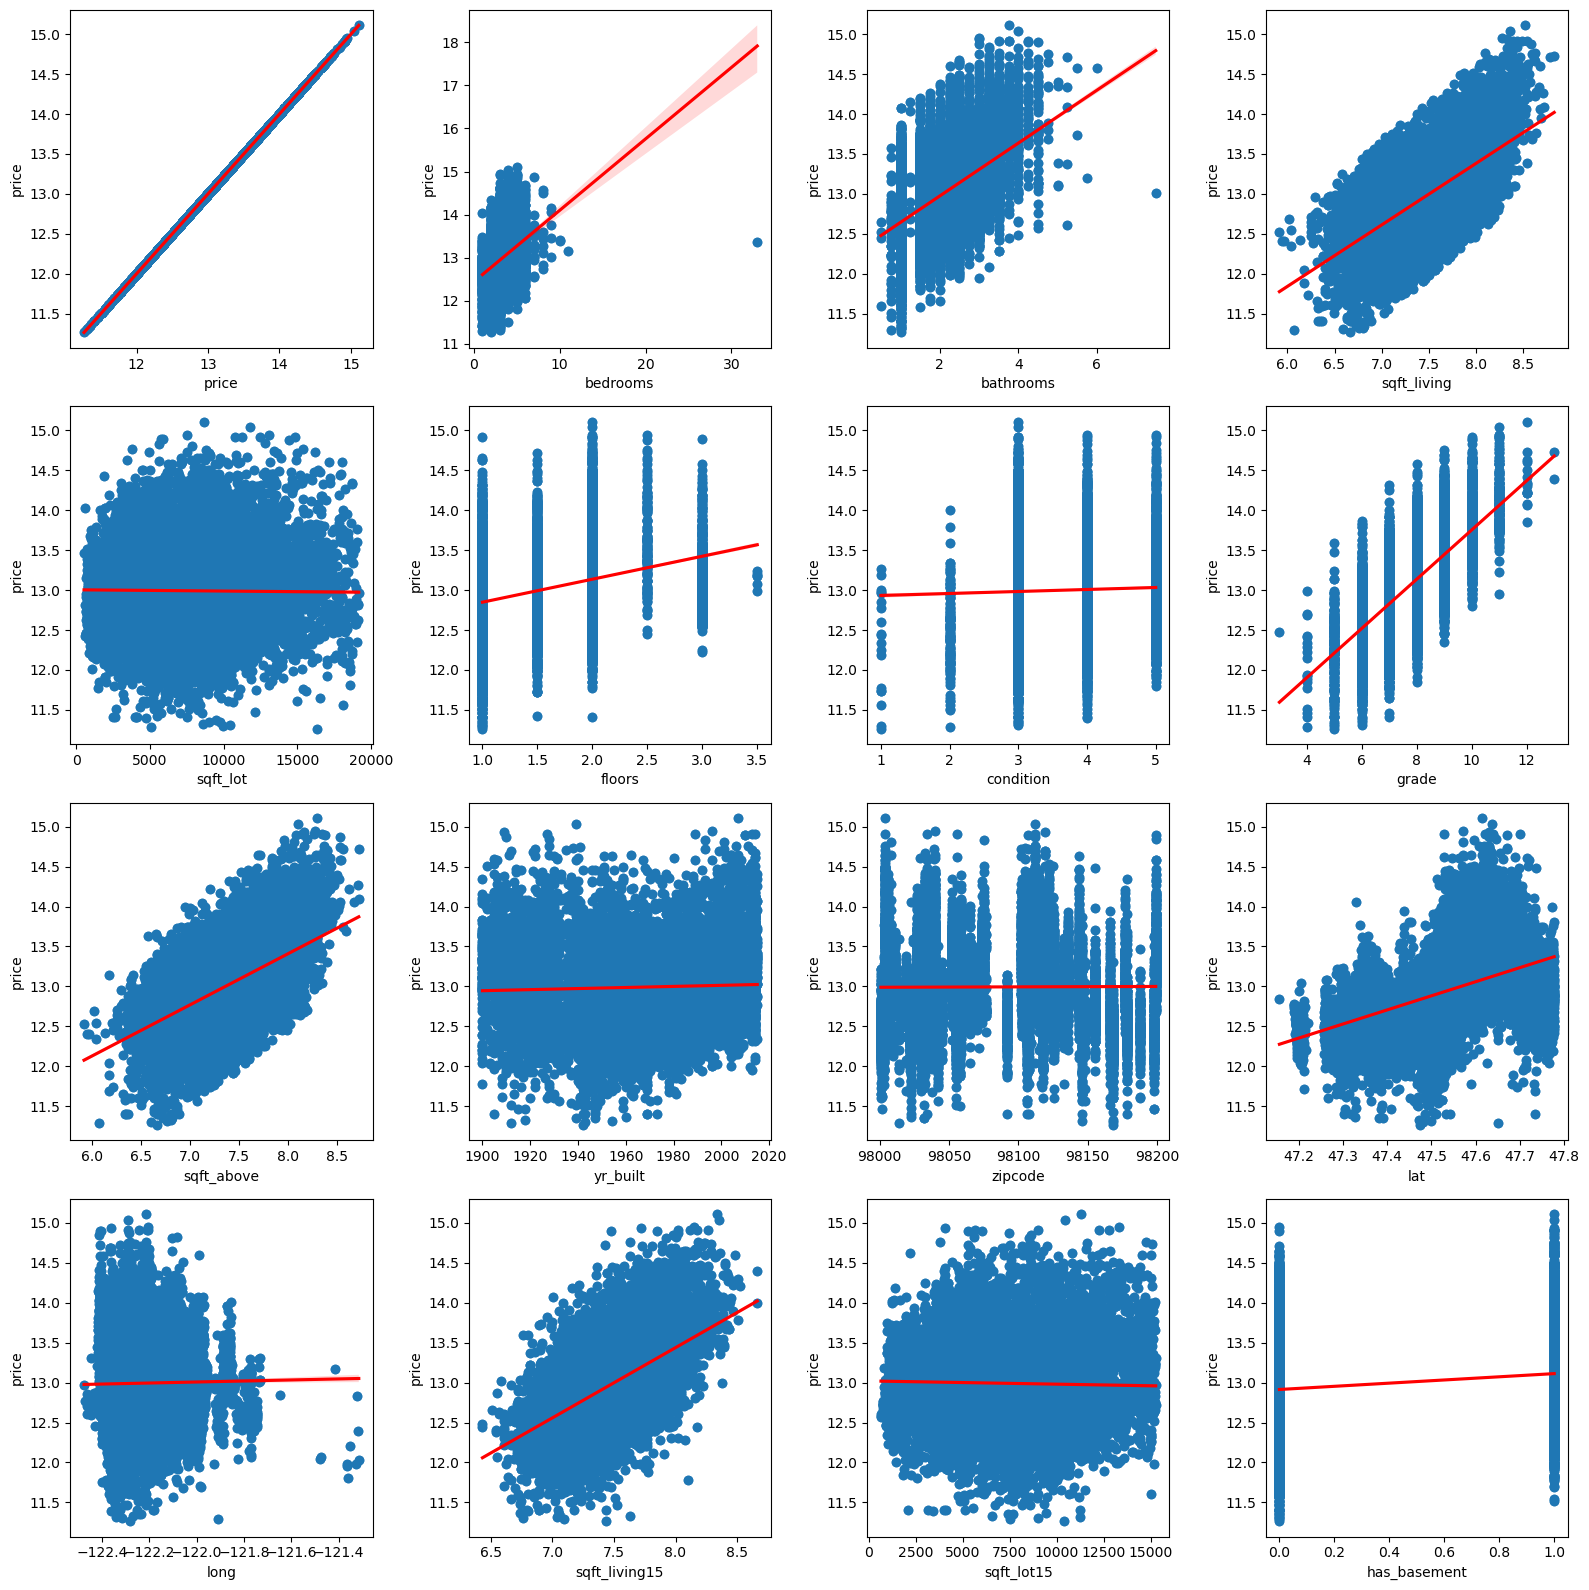

In [79]:
num_cols3 = len(df3.columns)
num_rows3 = (num_cols3 - 1) // 4 + 1

# Create subplots for scatter plots
fig, axs = plt.subplots(num_rows3, 4, figsize=(16, 4 * num_rows3))
axs = axs.flatten()

# Iterate over the columns of the DataFrame and create scatter plots with regression lines
columns3 = df3.columns
for i, col in enumerate(columns3):
    # Scatter plot
    axs[i].scatter(df3[col], df3['price'])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Price')
    
    # Regression line
    sns.regplot(x=df3[col], y=df3['price'], ax=axs[i], line_kws={'color': 'red'})

# Remove any unused subplots
for j in range(num_cols3, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [63]:
independent_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'has_basement', 'yr_built', 'sqft_living15', 'condition', 'zipcode', 'lat','long', 'sqft_lot15', 'sqft_lot',]

dependent_var = 'price'

# Prepare the data for modeling
X = sm.add_constant(df3[independent_vars])
y = df3[dependent_var]

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Make predictions
y_pred = results.predict(X)

# Calculate evaluation metrics
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3641.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:48:15   Log-Likelihood:                -173.96
No. Observations:               18049   AIC:                             379.9
Df Residuals:                   18033   BIC:                             504.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -13.9787      3.960     -3.530

# Observation
Iteration 3 OLS regression model achieved an R-squared value of 0.752, indicating that it explains approximately 75.2% of the variance in the price. The model's coefficients reveal significant relationships between various predictor variables and the price, including the number of bedrooms, bathrooms, square footage, floors, grade, and other factors.

On the test data, the model demonstrated a mean squared error (MSE) of 0.0597, a root mean squared error (RMSE) of 0.2443, and an R-squared (R2) value of 0.7518. These metrics suggest that the model performs well in predicting the price, with low errors and a good level of explained variance.

Overall, the OLS model provides valuable insights into the factors influencing housing prices and yields reasonably accurate predictions.

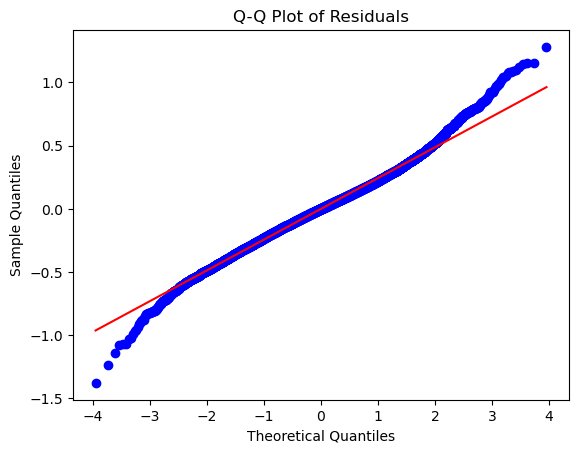

In [64]:
# Select relevant columns
independent_vars = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'has_basement', 'yr_built', 'sqft_living15', 'condition', 'zipcode', 'lat','long', 'sqft_lot15', 'sqft_lot',]
dependent_var = 'price'

# Prepare the data
X = df3[independent_vars]
y = df3[dependent_var]

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Calculate residuals
predicted_values = model.predict(X)
residuals = y - predicted_values

# Create Q-Q plot of residuals
fig, ax = plt.subplots()
stats.probplot(residuals, plot=ax)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Observation 
Not much changed has occurred to the q-q plot.

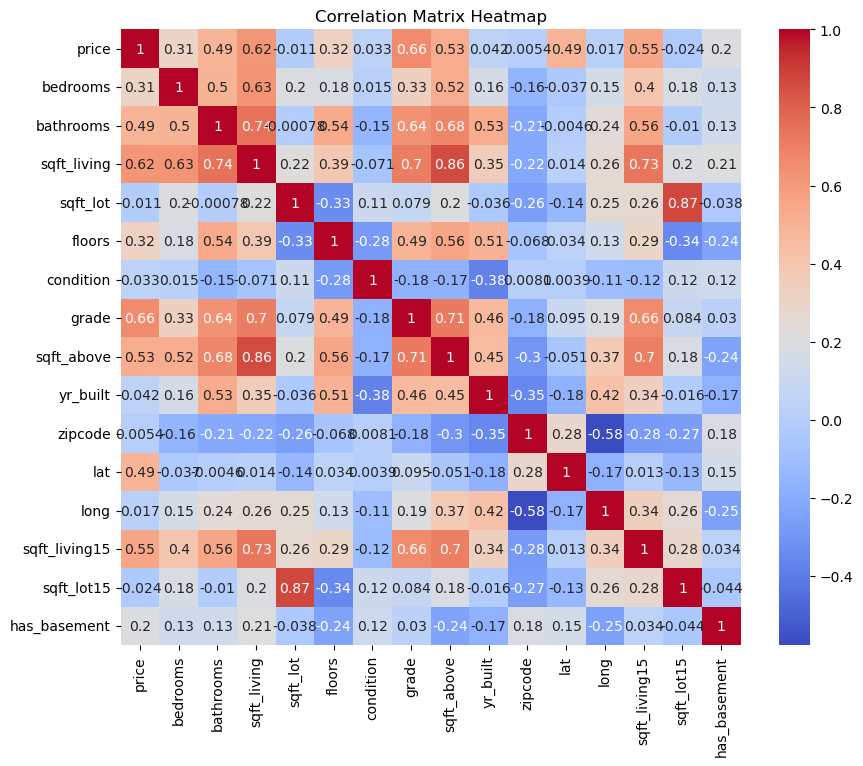

In [80]:
# Create a correlation matrix
corr_matrix = df3.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Observation 
Based on the correlation coefficients between the independent variables and the target variable 'price', here are some observations:

Strong Positive Correlations: Variables such as 'sqft_living' (0.62), 'grade' (0.66), 'sqft_above' (0.53), and 'sqft_living15' (0.55) exhibit strong positive correlations with 'price'. This indicates that as these variables increase, the 'price' tends to increase as well.

Moderate Positive Correlations: Variables such as 'bathrooms' (0.49), 'lat' (0.49), and 'floors' (0.32) show moderate positive correlations with 'price'. An increase in these variables generally corresponds to an increase in 'price', although the relationship may not be as strong as the variables mentioned above.

Weak Correlations: Some variables like 'bedrooms' (0.31), 'has_basement' (0.20), 'long' (0.017), 'condition' (0.033), 'yr_built' (0.042), 'sqft_lot15' (0.024), 'sqft_lot' (0.011), and 'zipcode' (0.0054) have weak correlations with 'price'. These variables may have less influence on the 'price' compared to other variables in the model.

Overall, the observed correlations suggest that variables such as 'sqft_living', 'grade', 'sqft_above', and 'sqft_living15' have the strongest positive relationship with 'price', while variables like 'bedrooms', 'has_basement', 'long', 'condition', 'yr_built', 'sqft_lot15', 'sqft_lot', and 'zipcode' have weaker correlations. 

# Model Validation (Train/Test Split)

In [73]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the OLS model on the training data
model = sm.OLS(y_train, X_train)
results = model.fit()

# Make predictions on training and test data
y_train_pred = results.predict(X_train)
y_test_pred = results.predict(X_test)

# Calculate MSE and RMSE for training data
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Calculate MSE and RMSE for test data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Print the evaluation metrics
print("Training Data:")
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)

print("\nTesting Data:")
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)


Training Data:
Mean Squared Error (MSE): 0.059918002049320164
Root Mean Squared Error (RMSE): 0.2447815394373525

Testing Data:
Mean Squared Error (MSE): 0.05909674142692631
Root Mean Squared Error (RMSE): 0.24309821354120706


In [74]:
# Calculate R-squared for training and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the R-squared values
print("Training Data:")
print("R-squared (R2):", r2_train)

print("\nTesting Data:")
print("R-squared (R2):", r2_test)

Training Data:
R-squared (R2): 0.7515081858226416

Testing Data:
R-squared (R2): 0.751538359548906


# Observation:

The OLS regression model performed reasonably well on both the training and testing data.

For the training data, the model achieved a mean squared error (MSE) of 0.0599 and a root mean squared error (RMSE) of 0.2448. These values indicate that, on average, the predicted house prices deviate from the actual prices by approximately 0.2448 units.

Similarly, for the testing data, the model achieved a slightly lower MSE of 0.0591 and a slightly lower RMSE of 0.2431. This suggests that the model's performance on unseen data is comparable to its performance on the training data.

Furthermore, the R-squared (R2) value is a measure of how well the model explains the variability in the dependent variable. The R2 value for both the training and testing data is approximately 0.7515, indicating that around 75.15% of the variability in house prices can be explained by the independent variables included in the model.

Based on these observations, the model's performance is consistent between the training and testing data, as indicated by similar MSE, RMSE, and R-squared values. There is no significant difference in performance, suggesting that the model is not overfitting or underfitting. It demonstrates a good balance between capturing the underlying patterns and generalizing to unseen data.

Overall, the OLS regression model demonstrates a reasonably good fit to the data, with low MSE and RMSE values and a relatively high R-squared value. However, it's worth noting that there may still be room for improvement, as there could be other variables or factors that contribute to the variability in house prices but are not captured in the current final model.

# Prive disturbution based on location

Text(0.5, 1.0, 'Price distribution')

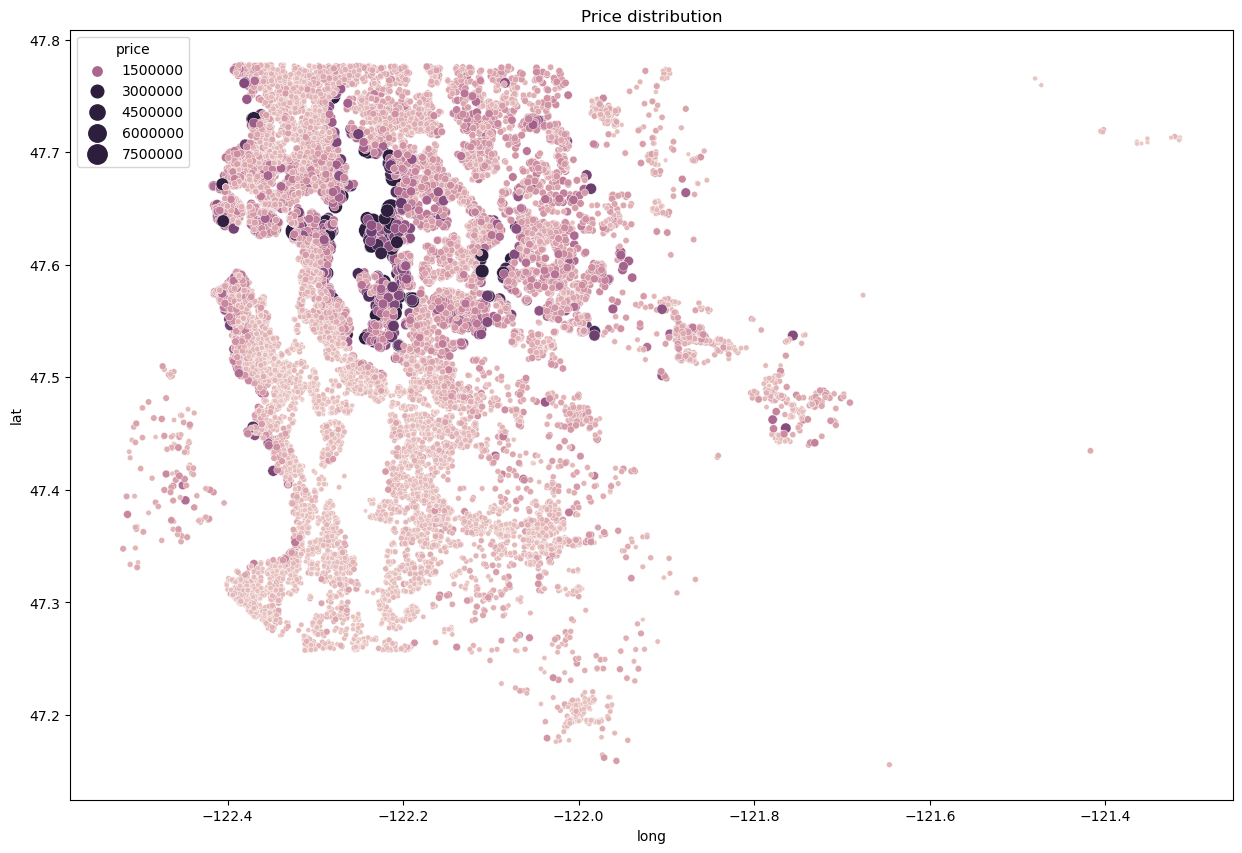

In [77]:
plt.figure(figsize=(15,10))
ax = sns.scatterplot(data=df, 
                x="long", 
                y="lat", 
                hue="price",
                hue_norm=(0, 3000000),
                size='price', 
                sizes=(10, 200))
ax.set_title('Price distribution')